# Split Cycle - Examples

This notebook contains examples from the paper "[Split Cycle: A New Condorcet Consistent Voting Method Independent of Clones and Immune to Spoilers](https://arxiv.org/abs/2004.02350)" by Wesley H. Holliday and Eric Pacuit.  


In [1]:
from pref_voting.profiles import *
from pref_voting.generate_profiles import *
from pref_voting.voting_methods import *
from itertools import chain, combinations, permutations

## Notation

Refer to our paper for details about the terminology and notation. 


In [2]:

# define some variables to simplify notation 
a = 0
b = 1
c = 2
d = 3
e = 4
f = 5
g = 6

# map candidate names to letters to match the notation in our papaer
cmap_abc     = {a:"a", b:"b", c:"c"}
cmap_abcd    = {a:"a", b:"b", c:"c", d:"d"}
cmap_abcde   = {a:"a", b:"b", c:"c", d:"d", e:"e"}
cmap_abcdef  = {a:"a", b:"b", c:"c", d:"d", e:"e", f:"f"}
cmap_abcdefg = {a:"a", b:"b", c:"c", d:"d", e:"e", f:"f", g:"g"}


# used to display lists of candidates using a cmap
display_cands = lambda cs, cmap: "{" + ', '.join([cmap[c] for c in cs]) + "}"

# powerset function needed to 
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))


## Examples from Section 1.1

In [3]:
## Example 1.1

# candidate names
cmap = {0: "Bush", 1:"Gore", 2:"Nader"}

 
prof = Profile(
    [
        [0, 1, 2],
        [1, 2, 0],
        [2, 1, 0]
    ], 
    rcounts = [2912790, 2912253, 97488], 
    cmap = cmap)


# display the profile
prof.display()

plurality.display(prof)

print(f"\nWithout {cmap[c]} in the election:")
# display the restricted profile without Nader
prof.display(curr_cands=[0,1])

plurality.display(prof, curr_cands = [0,1])



+---------+---------+-------+
| 2912790 | 2912253 | 97488 |
+---------+---------+-------+
|  Bush   |  Gore   | Nader |
|  Gore   |  Nader  | Gore  |
|  Nader  |  Bush   | Bush  |
+---------+---------+-------+
Plurality winner is {Bush}

Without Nader in the election:
+---------+---------+-------+
| 2912790 | 2912253 | 97488 |
+---------+---------+-------+
|  Bush   |  Gore   | Gore  |
|  Gore   |  Bush   | Bush  |
+---------+---------+-------+
Plurality winner is {Gore}


In [4]:
## Example 1.2

# candidate names
cand_d = 0
cand_r = 1
cand_p = 2

cmap = {cand_d: "d", cand_r:"r", cand_p:"p"}

prof = Profile(
    [
        [cand_r, cand_d, cand_p],
        [cand_d, cand_p, cand_r],
        [cand_p, cand_d, cand_r]
    ], 
    rcounts = [27, 29, 34], 
    cmap = cmap)


# display the profile
prof.display()

ranked_choice.display(prof)
print(f"The Condorcet winner is {cmap[prof.condorcet_winner()]}")
print(f"The margin of {cmap[cand_d]} over {cmap[cand_p]} is {prof.margin(cand_d, cand_p)}")
print(f"The margin of {cmap[cand_d]} over {cmap[cand_r]} is {prof.margin(cand_d, cand_r)}")
print(f"\nWithout {cmap[cand_r]} in the election:")
# display the restricted profile without Nader
prof.display(curr_cands=[cand_p, cand_d])

ranked_choice.display(prof, curr_cands = [cand_p, cand_d])


print(f"\nWithout {cmap[cand_d]} in the election:")
# display the restricted profile without Nader
prof.display(curr_cands=[cand_p, cand_r])

ranked_choice.display(prof, curr_cands = [cand_p, cand_r])



+----+----+----+
| 27 | 29 | 34 |
+----+----+----+
| r  | d  | p  |
| d  | p  | d  |
| p  | r  | r  |
+----+----+----+
Ranked Choice winner is {d}
The Condorcet winner is d
The margin of d over p is 22
The margin of d over r is 36

Without r in the election:
+----+----+----+
| 27 | 29 | 34 |
+----+----+----+
| d  | d  | p  |
| p  | p  | d  |
+----+----+----+
Ranked Choice winner is {d}

Without d in the election:
+----+----+----+
| 27 | 29 | 34 |
+----+----+----+
| r  | p  | p  |
| p  | r  | r  |
+----+----+----+
Ranked Choice winner is {p}


+---+---+---+
| 2 | 3 | 4 |
+---+---+---+
| b | a | c |
| a | c | b |
| c | b | a |
+---+---+---+


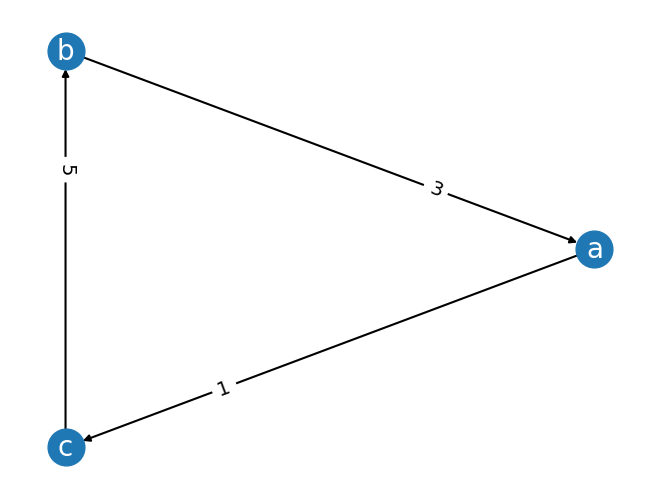

There is an edge from r to d since 6 voters rank r above d and 3 voters rank d above r. So, Margin(r, d) = 3

Minimax winner is {c}
Ranked Pairs winner is {c}
Beat Path winner is {c}


In [5]:

prof = Profile(
    [
        [b, a, c],
        [a, c, b],
        [c, b, a]
    ], 
    rcounts = [2, 3, 4], 
    cmap = cmap_abc)


# display the profile
prof.display()

# display the margin graph
prof.display_margin_graph()

print(f"There is an edge from {cmap[b]} to {cmap[a]} since \
{prof.support(b,a)} voters rank {cmap[b]} above {cmap[a]} and {prof.support(a,b)} voters rank {cmap[a]} above {cmap[b]}. So, Margin({cmap[b]}, {cmap[a]}) = {prof.margin(b,a)}")    
print()
minimax.display(prof)
ranked_pairs.display(prof)
beat_path.display(prof)

+---+---+---+
| 1 | 3 | 4 |
+---+---+---+
| a | a | c |
| c | b | a |
| b | c | b |
+---+---+---+


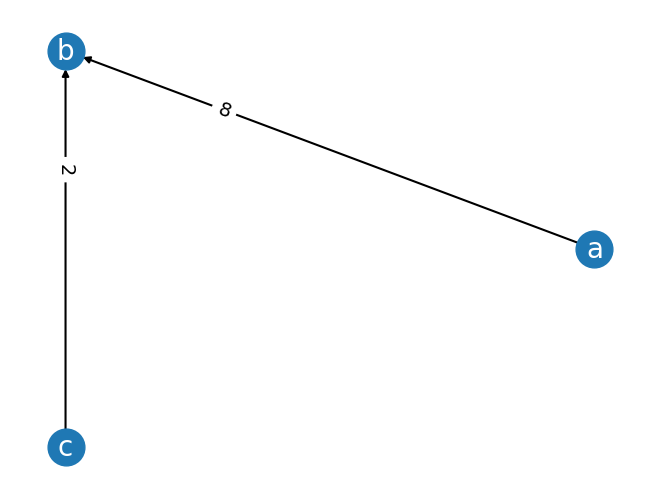

In [6]:
prof = Profile(
    [
        [a, c, b],
        [a, b, c],
        [c, a, b]
    ], 
    rcounts = [1, 3, 4], 
    cmap = cmap_abc)


# display the profile
prof.display()

# display the margin graph
prof.display_margin_graph()



### Examples from Section 1.2

In [7]:
print("\nIllustrating the strong no show paradox - Section 1.2\n\n")


#candidate name map
cmap = cmap_abc

# Example from pg. 6 in Section 1.2
prof1 = Profile(
    [
        (a, b, c),
        (b, c, a),
        (c, a, b),
        (c, b, a)
    ], 
    rcounts = [2, 3, 1, 3], 
    cmap = cmap)

# display the profile
prof1.display()

# Winners for instant runoff - also called ranked choice voting, see Appendix C.6
ranked_choice.display(prof1) # display_winners is found in voting/voting_methods.py

print(f"\n\nTwo voters are added with the ranking ({cmap[a]},{cmap[b]},{cmap[c]})\n")
# Example from pg. 6 in Section 1.2
prof2 = Profile(
    [
        (a, b, c),
        (b, c, a),
        (c, a, b),
        (c, b, a)
    ], 
    rcounts = [4, 3, 1, 3], 
    cmap = cmap)


# display the profile
prof2.display()

# Winners for instant runoff - also called ranked choice voting, see Appendix C.6
ranked_choice.display(prof2)



Illustrating the strong no show paradox - Section 1.2


+---+---+---+---+
| 2 | 3 | 1 | 3 |
+---+---+---+---+
| a | b | c | c |
| b | c | a | b |
| c | a | b | a |
+---+---+---+---+
Ranked Choice winner is {b}


Two voters are added with the ranking (a,b,c)

+---+---+---+---+
| 4 | 3 | 1 | 3 |
+---+---+---+---+
| a | b | c | c |
| b | c | a | b |
| c | a | b | a |
+---+---+---+---+
Ranked Choice winner is {c}


In [8]:
print("\nIllustrating failure of positive involvement - Section 1.2\n\n")

def sequential_elimination(profile, curr_cands = None, elim_order = None): 
    
    candidates = curr_cands if curr_cands is not None else profile.candidates
    # the default elimination order is a, b, c, d, ....
    elim_order =  elim_order if elim_order is not None else sorted(candidates)
    
    if profile.margin(elim_order[0], elim_order[1]) > 0: 
        winner = elim_order[0]
    elif profile.margin(elim_order[1], elim_order[0]) > 0: 
        winner = elim_order[1]
    else: 
        return None # need to implement a tiebreaker
    
    for c in elim_order[2::]: 
        if profile.margin(c, winner) > 0: 
            winner = c
        elif profile.margin(winner, c) > 0: 
            continue
        else: 
            return None # need to implement a tiebreaker
    return sorted([winner])


#candidate name map
cmap = cmap_abc


# Example from pg. 6 in Section 1.2
prof1 = Profile(
    [
        (a, b, c),
        (b, c, a),
        (c, a, b)
    ], 
    rcounts = [2, 2, 1], 
    cmap = cmap)

# display the profile
prof1.display()


print(f"The sequential elimination winner is {display_cands(sequential_elimination(prof1), cmap)}")

print(f"\n\nTwo voters are added with the ranking ({cmap[c]},{cmap[b]},{cmap[a]})\n")
# Example from pg. 6 in Section 1.2
prof2 = Profile(
    [
        (a, b, c),
        (b, c, a),
        (c, a, b),
        (c, b, a)
    ], 
    rcounts = [2, 2, 1, 2], 
    cmap = cmap)


# display the profile
prof2.display()

print(f"The sequential elimination winner is {display_cands(sequential_elimination(prof2), cmap)}")



Illustrating failure of positive involvement - Section 1.2


+---+---+---+
| 2 | 2 | 1 |
+---+---+---+
| a | b | c |
| b | c | a |
| c | a | b |
+---+---+---+
The sequential elimination winner is {c}


Two voters are added with the ranking (c,b,a)

+---+---+---+---+
| 2 | 2 | 1 | 2 |
+---+---+---+---+
| a | b | c | c |
| b | c | a | b |
| c | a | b | a |
+---+---+---+---+
The sequential elimination winner is {b}


## Examples from Section 3.1

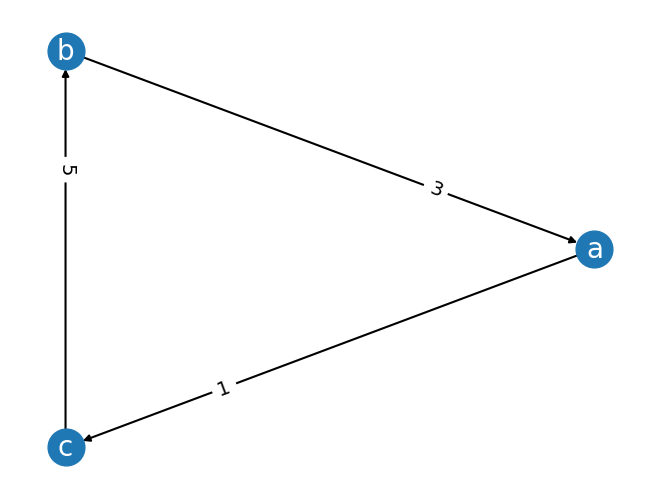

Split Cycle winner is {c}
GETCHA winners are {a, b, c}
GOCHA winners are {a, b, c}


In [9]:
# item 1

cmap = cmap_abc

prof = Profile([
    (a, c, b),
    (c, b, a),
    (b, a, c),
    (c, a, b),
    (b, c, a)
], 
    rcounts = [5, 4, 4, 2, 2], 
    cmap = cmap)


#display the profile
prof.display_margin_graph()

split_cycle.display(prof)
getcha.display(prof)
gocha.display(prof)


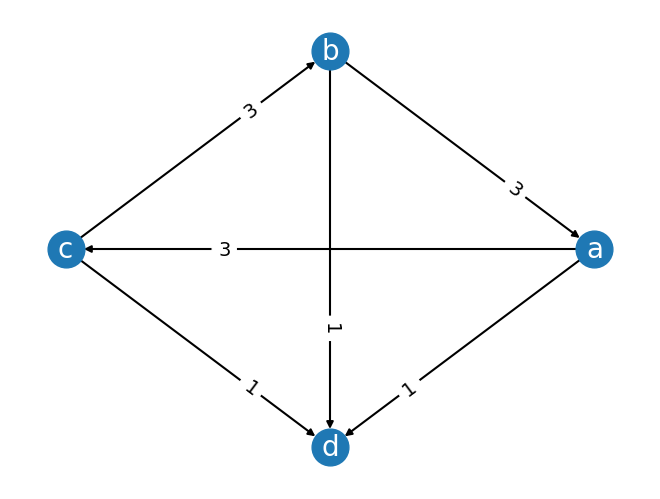

Split Cycle winners are {a, b, c}
Minimax winner is {d}


In [10]:
# item 2

cmap = cmap_abcd

prof = Profile([
    (d, b, a, c),
    (a, d, c, b),
    (a, c, b, d),
    (c, b, d, a),
    (c, b, a, d) 
], 
    rcounts = [3, 1, 2, 1, 2], 
    cmap = cmap)


#display the profile
prof.display_margin_graph()

split_cycle.display(prof)
minimax.display(prof)


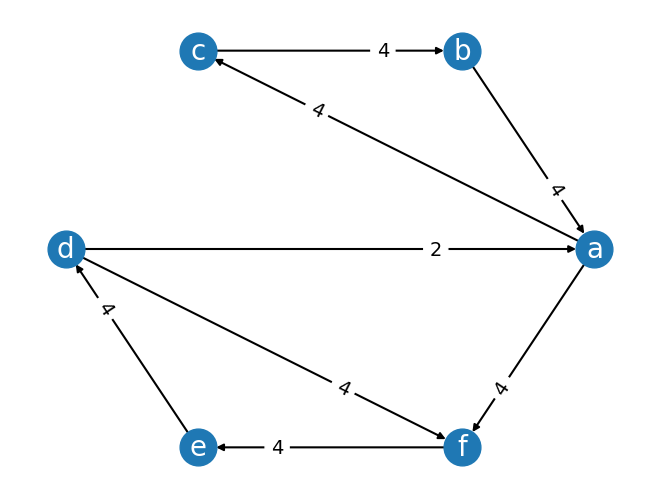

Split Cycle winners are {a, b, c, d, e}
Beat Path winners are {a, b, c}


In [11]:
# item 3

cmap = cmap_abcdef

prof = Profile([
    (b,a,c,e,d,f),
    (e,d,f,b,a,c),
    (a,c,b,d,f,e),
    (d,f,e,a,c,b),
    (c,b,a,f,e,d),
    (f,e,d,c,b,a),
    (a,f,b,c,d,e),
    (e,d,c,b,a,f),
    (d,a,b,c,e,f),
    (f,e,c,b,d,a) 
], 
    rcounts = [2, 2, 2, 2, 2, 2, 2, 2, 1, 1], 
    cmap = cmap)


#display the profile
prof.display_margin_graph()

split_cycle.display(prof)
beat_path.display(prof)


## Section 3.2: Defining Split Cycle

**Note**: Split Cycle is defined in the file pref_voting/margin_based_methods.py.   The definition of "split_cycle_winners" given below is given to illustrate the relevant definitions.   We will use the function defined in the pref_voting directory for all the examples. 


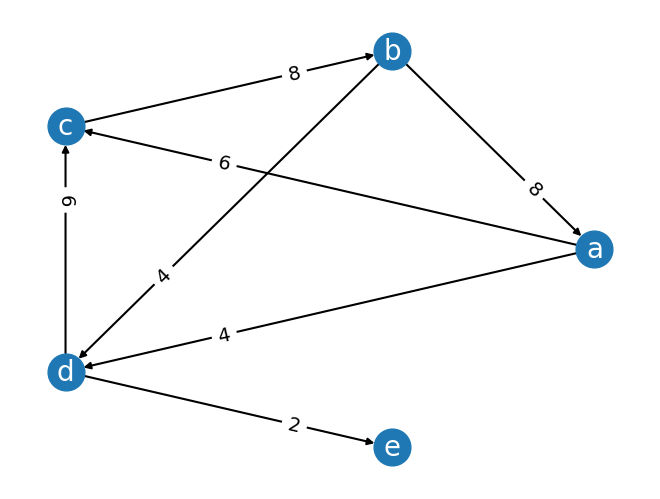


The cycles in the profile are: 
(a,d,c,b)
(a,c,b)
(b,d,c)

The splitting numbers of the cycles in the profile are: 
The Splitting Number of the cycle (a,d,c,b) is 4
The Splitting Number of the cycle (a,c,b) is 6
The Splitting Number of the cycle (b,d,c) is 4

The defeats in the profile are: 
    a does not defeat a
    a does not defeat b
    a does not defeat c
    a does not defeat d
    a does not defeat e
    b defeats a
    b does not defeat b
    b does not defeat c
    b does not defeat d
    b does not defeat e
    c does not defeat a
    c defeats b
    c does not defeat c
    c does not defeat d
    c does not defeat e
    d does not defeat a
    d does not defeat b
    d defeats c
    d does not defeat d
    d defeats e
    e does not defeat a
    e does not defeat b
    e does not defeat c
    e does not defeat d
    e does not defeat e

The undefeated candidates: {d}


In [12]:

def splitting_number(cycle, edata): 
    """
    Defintion 3.2: Return the splitting number of a cycle in the election edata.   
    """
    margins = [edata.margin(c, cycle[cidx+1]) for cidx, c in enumerate(cycle[0:-1])] + [edata.margin(cycle[-1], cycle[0])]
    
    if any([m < 0 for m in margins]): 
        print(f"{cycle} is not a cycle")
        return None
    
    return min(margins)

def split_cycle_defeats(a, b, edata): 
    """
    Definition 3.3: Return True of a defeats b in edata according to Split Cycle. 
    """

    return edata.margin(a, b) > 0 and all([edata.margin(a,b) > splitting_number(cycle, edata) 
                                           for cycle in edata.cycles() if a in cycle and b in cycle])

def split_cycle_winners(edata): 
    """
    Definition 3.5: The Split Cycle winners are the set of candidates not defeated by any other candidate. 
    """
    
    return sorted([a for a in edata.candidates 
                   if not any([split_cycle_defeats(b, a, edata) for b in edata.candidates])])

cmap = cmap_abcde

# Example 3.8
prof = Profile([
    (e, c, b, a, d),
    (c, b, a, d, e),
    (e, b, a, d, c),
    (d, a, c, b, e),
    (c, d, b, a, e),
    (d, e, a, b, c)
], 
    rcounts = [4, 3, 7, 7, 2, 1], 
    cmap = cmap)


prof.display_margin_graph()
print("\nThe cycles in the profile are: ")
for cycle in prof.cycles(): 
    print(f"{'(' + ','.join([cmap[_c] for _c in cycle]) + ')'}")
    
print("\nThe splitting numbers of the cycles in the profile are: ")
for cycle in prof.cycles(): 
    print(f"The Splitting Number of the cycle {'(' + ','.join([cmap[_c] for _c in cycle]) + ')'} is {splitting_number(cycle, prof)}")

print("\nThe defeats in the profile are: ")
for cand1 in prof.candidates:
    for cand2 in prof.candidates:
        print(f"    {cmap[cand1]} {'defeats' if split_cycle_defeats(cand1, cand2, prof) else 'does not defeat'} {cmap[cand2]}")
                       
print(f"\nThe undefeated candidates: {display_cands(split_cycle_winners(prof), cmap)}")
                                   

### Alternative Definition of Split Cycle defeat using Lemma 3.12 and Definition 3.14

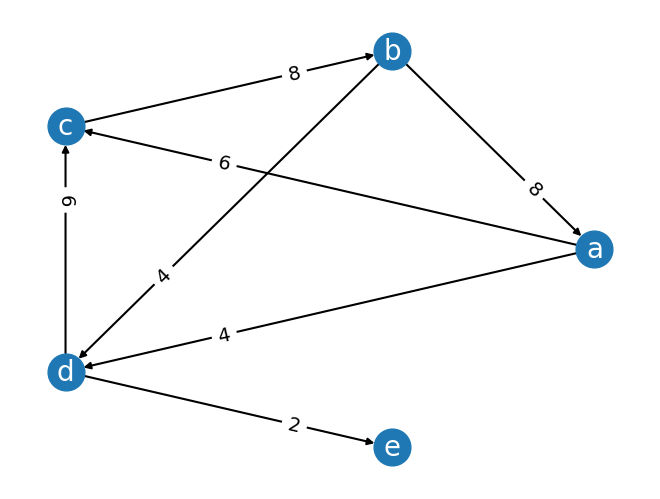

The cycle numbers of each pairs of candidates: 
The Cycle Number of (a, a) is 0
The Cycle Number of (a, b) is 0
The Cycle Number of (a, c) is 6
The Cycle Number of (a, d) is 4
The Cycle Number of (a, e) is 0
The Cycle Number of (b, a) is 6
The Cycle Number of (b, b) is 0
The Cycle Number of (b, c) is 0
The Cycle Number of (b, d) is 4
The Cycle Number of (b, e) is 0
The Cycle Number of (c, a) is 0
The Cycle Number of (c, b) is 6
The Cycle Number of (c, c) is 0
The Cycle Number of (c, d) is 0
The Cycle Number of (c, e) is 0
The Cycle Number of (d, a) is 0
The Cycle Number of (d, b) is 0
The Cycle Number of (d, c) is 4
The Cycle Number of (d, d) is 0
The Cycle Number of (d, e) is 0
The Cycle Number of (e, a) is 0
The Cycle Number of (e, b) is 0
The Cycle Number of (e, c) is 0
The Cycle Number of (e, d) is 0
The Cycle Number of (e, e) is 0

The undefeated candidates: {d}


In [13]:
def next_cand(cand, cycle): 
    """
    Return the candidate next to cand in the cycle
    
    """
    cand_idx = cycle.index(cand)
    
    if cand_idx == -1: 
        print(f"Error: {cand} not in the cycle {cycle}")
        return None
    return cycle[cand_idx + 1] if cand_idx < len(cycle) - 1 else cycle[0]

def find_cycle_numbers(edata):
    """
    Definition 3.14: Return the cycle number of all pairs of candidates. 
    """
    candidates = edata.candidates 
    
    # find the cycle number for each candidate
    cycle_numbers = {c1: {c2: 0 for c2 in candidates} for c1 in candidates}
    
    cycles = edata.cycles()
    
    for a in candidates: 
        for b in candidates: 
            cycle_numbers[a][b] = max([0] + [splitting_number(cycle, edata) for cycle in cycles 
                                             if a in cycle and b in cycle and next_cand(a, cycle) == b])
    return cycle_numbers

def split_cycle_winners_v2(edata): 
    """Alternative definition of Split Cycle using Lemma 3.15"""
    
    cycle_numbers = find_cycle_numbers(edata)
    
    return sorted([a for a in edata.candidates 
                   if not any([edata.margin(b, a) > cycle_numbers[b][a] for b in edata.candidates])])
    
# Example 3.8
prof = Profile([
    (e, c, b, a, d),
    (c, b, a, d, e),
    (e, b, a, d, c),
    (d, a, c, b, e),
    (c, d, b, a, e),
    (d, e, a, b, c)
], 
    rcounts = [4, 3, 7, 7, 2, 1], 
    cmap = cmap)

prof.display_margin_graph()
cycle_numbers = find_cycle_numbers(prof)

print("The cycle numbers of each pairs of candidates: ")
for cand1 in prof.candidates: 
    for cand2 in prof.candidates: 
        print(f"The Cycle Number of ({cmap[cand1]}, {cmap[cand2]}) is {cycle_numbers[cand1][cand2]}")

print(f"\nThe undefeated candidates: {display_cands(split_cycle_winners_v2(prof), cmap)}")


### Example 3.8

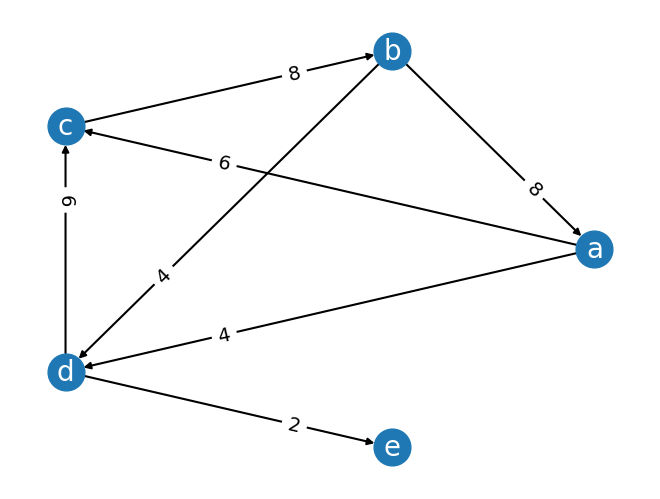

Split Cycle winner is {d}


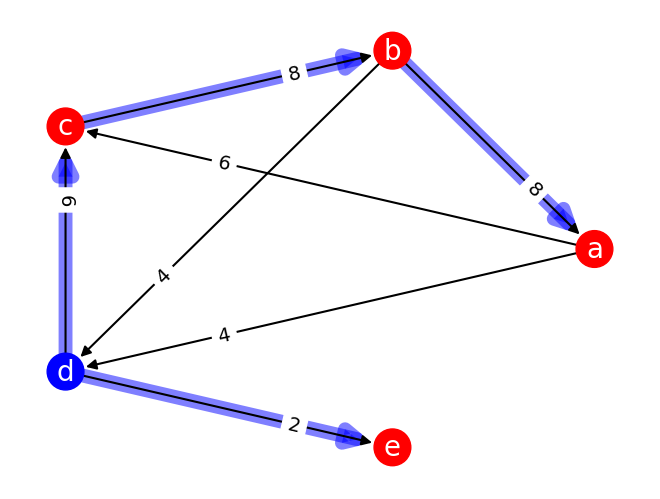

In [14]:

cmap = cmap_abcde

num_cands = 5

# Example from pg. 6 in Section 1.2
prof = Profile([
    (e, c, b, a, d),
    (c, b, a, d, e),
    (e, b, a, d, c),
    (d, a, c, b, e),
    (c, d, b, a, e),
    (d, e, a, b, c)
], 
    rcounts = [4, 3, 7, 7, 2, 1], 
    cmap = cmap)


#display the profile
prof.display_margin_graph()

split_cycle.display(prof)

# display the profile with the Split Cycle defeat relation highlighted
sc_defeat = split_cycle_defeat(prof)
prof.display_margin_graph_with_defeat(sc_defeat)


### An Alterantive Algorithm to find the Split Cycle winners based on Lemma 3.17

See notebook 01-SplitCycle.ipynb for an algorithm based on Lemma 3.17.

### An Alterantive Algorithm to find the Split Cycle winners based on the Floyd-Warshall Algorithm

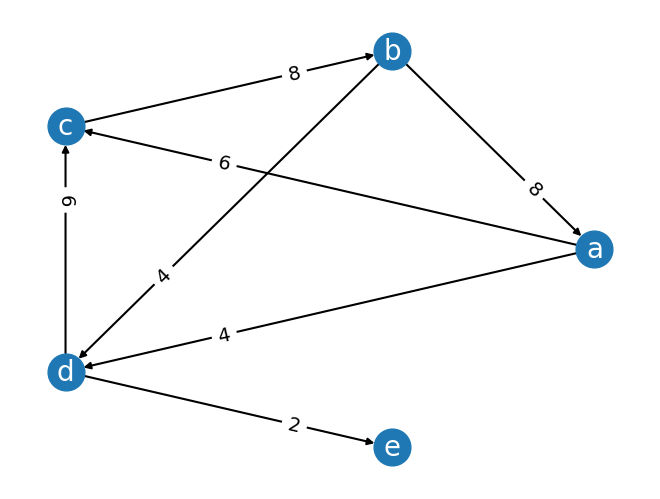

Split Cycle winners using Definition 3.5: {d}
Split Cycle winners using Definition 3.14 and Lemma 3.15: {d}
Split Cycle winners using a variant of the Floyd-Warshall Algorithm: {d}


In [15]:
# The following code is available in voting/voting_methods.py, but is included here for reference. 

def _split_cycle(profile):   
    """Implementation of Split Cycle using a variation of the Floyd-Warshall Algorithm  
    """
    candidates = profile.candidates
    weak_condorcet_winners = {c:True for c in candidates}
    mg = [[-np.inf for _ in candidates] for _ in candidates]
    
    # Weak Condorcet winners are Split Cycle winners
    for c1 in candidates:
        for c2 in candidates:
            if (profile.support(c1,c2) > profile.support(c2,c1) or c1 == c2):
                mg[c1][c2] = profile.support(c1,c2) - profile.support(c2,c1)
                weak_condorcet_winners[c2] = weak_condorcet_winners[c2] and (c1 == c2)
    
    strength = list(map(lambda i : list(map(lambda j : j , i)) , mg))
    for i in candidates:         
        for j in candidates: 
            if i!= j:
                if not weak_condorcet_winners[j]: # weak Condorcet winners are Split Cycle winners
                    for k in candidates: 
                        if i!= k and j != k:
                            strength[j][k] = max(strength[j][k], min(strength[j][i],strength[i][k]))
    winners = {i:True for i in candidates}
    for i in candidates: 
        for j in candidates:
            if i!=j:
                if mg[j][i] > strength[i][j]: # the main difference with Beat Path
                    winners[i] = False
    return sorted([c for c in candidates if winners[c]])

cmap = cmap_abcde

num_cands = 5

# Example from pg. 6 in Section 1.2
prof = Profile([
    (e, c, b, a, d),
    (c, b, a, d, e),
    (e, b, a, d, c),
    (d, a, c, b, e),
    (c, d, b, a, e),
    (d, e, a, b, c)
], 
    rcounts = [4, 3, 7, 7, 2, 1], 
    cmap = cmap)

prof.display_margin_graph()

print(f"Split Cycle winners using Definition 3.5: {display_cands(split_cycle_winners(prof), cmap)}")
print(f"Split Cycle winners using Definition 3.14 and Lemma 3.15: {display_cands(split_cycle_winners_v2(prof), cmap)}")
print(f"Split Cycle winners using a variant of the Floyd-Warshall Algorithm: {display_cands(_split_cycle(prof), cmap)}")


In the remainder of this notebook, we will use the following functions implemented in pref_voting/margin_based_methods.py: 

1. ``split_cycle``
2. ``split_cycle``
3. ``split_cycle_defeat``




## Section 3.3 Refinements of Split Cycle


### Both Beat Path and Ranked Pairs are refinements of Split Cycle (cf. Lemma 3.18 and Lemma 3.20)


There are profiles for 4 candidates in which: 

1. there is a unique Beat Path winner $c$;
2. there is a unique Ranked Pairs winner $d$;
3. $c\neq d$; and 
3. the Split Cycle winners are $\{c, d\}$ 

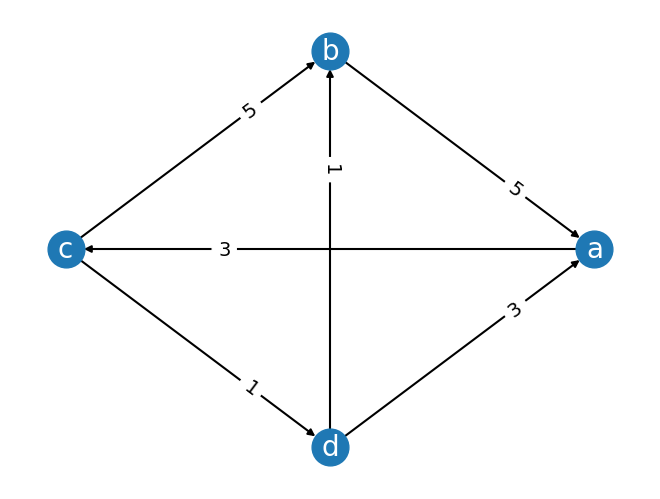

NameError: name 'split_cycle_faster' is not defined

In [16]:

cmap = cmap_abcd
prof = Profile(
    [ 
        [d, a, c, b],
        [a, c, b, d],
        [d, c, b, a],
        [c, b, d, a],
        [c, b, a, d],
        [a, c, d, b],
        [d, b, a, c],
        [b, a, c, d],
        [c, d, b, a],
        [b, d, a, c]
    ],
    [2, 1, 1, 1, 2, 1, 2, 1, 1, 1],
    cmap = cmap
)
prof.display_margin_graph()

split_cycle.display(prof)
beat_path_Floyd_Warshall.display(prof)
ranked_pairs.display(prof)

In [17]:
def beat_path_defeat(edata, curr_cands = None, strength_function = None):   
    """Return the defeat relation for Beat Path. 
    
    Args:
        edata (Profile, ProfileWithTies, MarginGraph): Any election data that has a `margin` method. 
        curr_cands (List[int], optional): If set, then find the winners for the profile restricted to the candidates in ``curr_cands``
        strength_function (function, optional): The strength function to be used to calculate the strength of a path.   The default is the margin method of ``edata``.   This only matters when the ballots are not linear orders. 

    Returns: 
        A networkx object representing the Beat Path defeat relation. 

    .. seealso::

        :meth:`pref_voting.profiles.Profile.beat_path`

    :Example: 

    .. plot::  margin_graphs_examples/mg_ex_bp_defeat.py
        :context: reset  
        :include-source: True

    """

    defeat = nx.DiGraph()
    
    candidates = edata.candidates if curr_cands is None else curr_cands    
    strength_function = edata.margin if strength_function is None else strength_function
    
    mg = get_mg(edata, curr_cands = curr_cands)
    
    beat_paths_weights = {c: {c2:0 for c2 in candidates if c2 != c} for c in candidates}
    for c in candidates: 
        for other_c in beat_paths_weights[c].keys():
            all_paths = list(nx.all_simple_paths(mg, c, other_c))
            if len(all_paths) > 0:
                beat_paths_weights[c][other_c] = max([min([strength_function(p[i], p[i+1]) for i in range(0,len(p)-1)]) for p in all_paths])
    
    winners = list()
    
    defeat.add_nodes_from(candidates)
    edges = list()
    for c1 in candidates: 
        for c2 in candidates: 
            if c1 != c2: 
                if beat_paths_weights[c1][c2] > beat_paths_weights[c2][c1]: 
                    edges.append((c1, c2))

    defeat.add_edges_from(edges)
    return defeat


def borda_defeat(prof): 
    
    bscores = prof.borda_scores()
    
    defeat = nx.DiGraph()
    defeat.add_nodes_from(prof.candidates)
    
    for c1 in prof.candidates: 
        for c2 in prof.candidates: 
            if bscores[c1] > bscores[c2]:  
                defeat.add_edge(c1, c2)
            elif bscores[c2] > bscores[c1]:  
                defeat.add_edge(c2, c1)

    return defeat

def copeland_defeat(prof): 
    
    cscores = prof.copeland_scores()
    
    defeat = nx.DiGraph()
    defeat.add_nodes_from(prof.candidates)
    
    for c1 in prof.candidates: 
        for c2 in prof.candidates: 
            if cscores[c1] > cscores[c2]:  
                defeat.add_edge(c1, c2)
            elif cscores[c2] > cscores[c1]:  
                defeat.add_edge(c2, c1)

    return defeat

+---+---+---+---+---+---+---+---+---+---+
| 2 | 1 | 1 | 1 | 2 | 1 | 2 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+
| d | a | d | c | c | a | d | b | c | b |
| a | c | c | b | b | c | b | a | d | d |
| c | b | b | d | a | d | a | c | b | a |
| b | d | a | a | d | b | c | d | a | c |
+---+---+---+---+---+---+---+---+---+---+


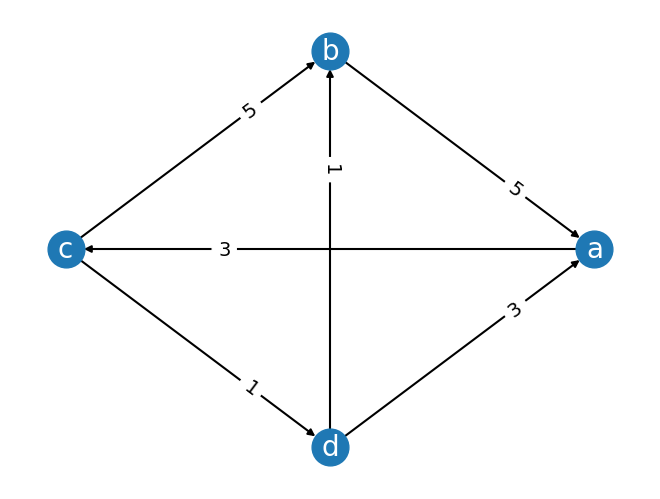




Copeland defeat
Copealnd scores: a: -1.0, b: -1.0, c: 1.0, d: 1.0


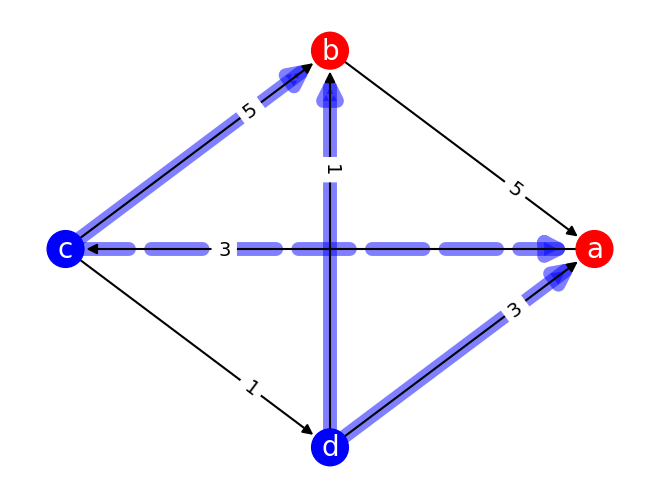

Uncovered Set defeat


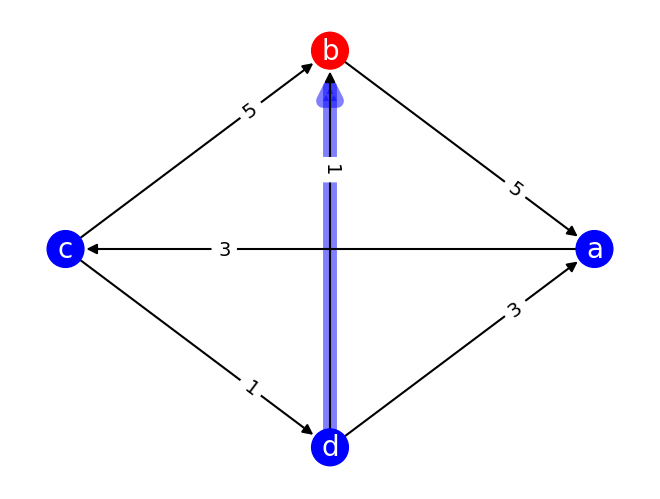

Beat Path defeat


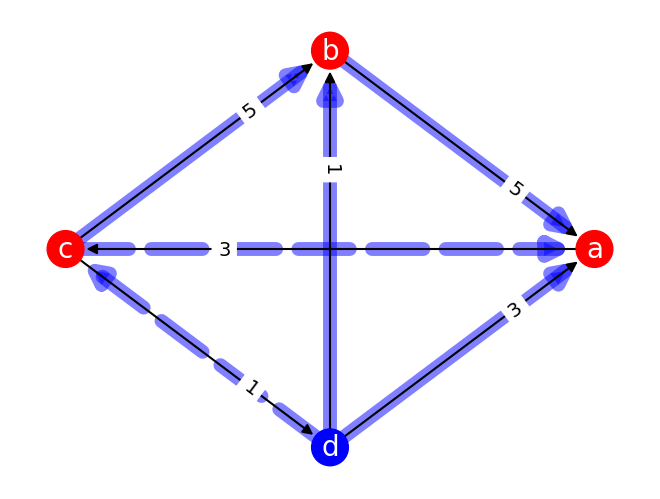

Split Cycle defeat


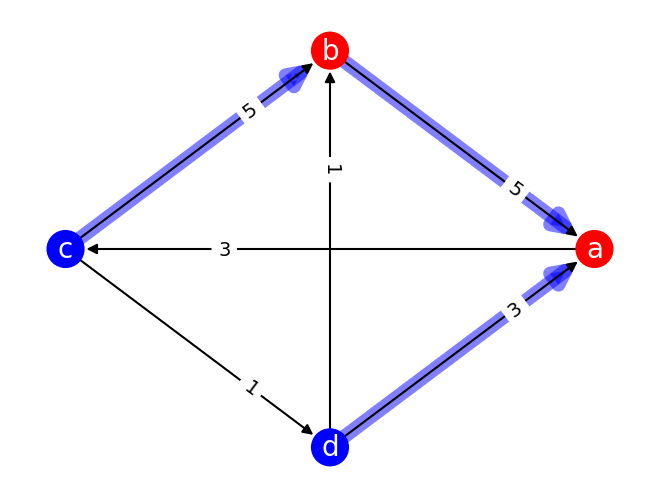

Borda defeat
Borda scores: a: 17, b: 19, c: 21, d: 21


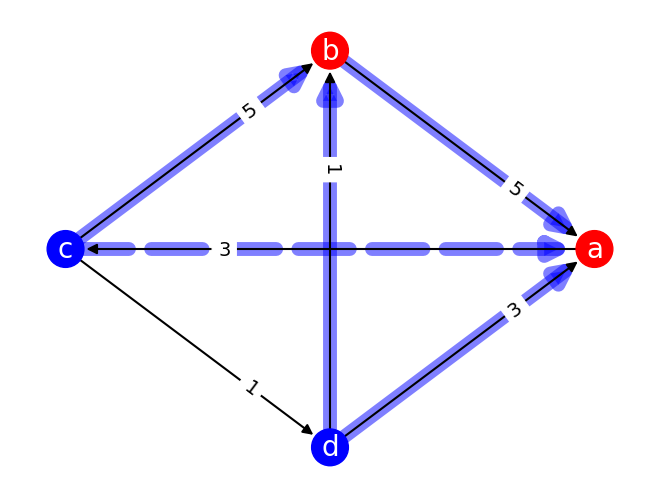

In [18]:
prof.display()
prof.display_margin_graph()

print("\n\n")

print("Copeland defeat")
print(f"Copealnd scores: {', '.join([cmap_abcd[_c] + ': ' + str(prof.copeland_scores()[_c]) for _c in prof.candidates])}")

prof.margin_graph().display_with_defeat(copeland_defeat(prof))


print("Uncovered Set defeat")
prof.margin_graph().display_with_defeat(uc_gill_defeat(prof))



print("Beat Path defeat")
prof.margin_graph().display_with_defeat(beat_path_defeat(prof))


print("Split Cycle defeat")

prof.margin_graph().display_with_defeat(split_cycle_defeat(prof))

print("Borda defeat")
print(f"Borda scores: {', '.join([cmap_abcd[_c] + ': ' + str(prof.borda_scores()[_c]) for _c in prof.candidates])}")
prof.margin_graph().display_with_defeat(borda_defeat(prof))



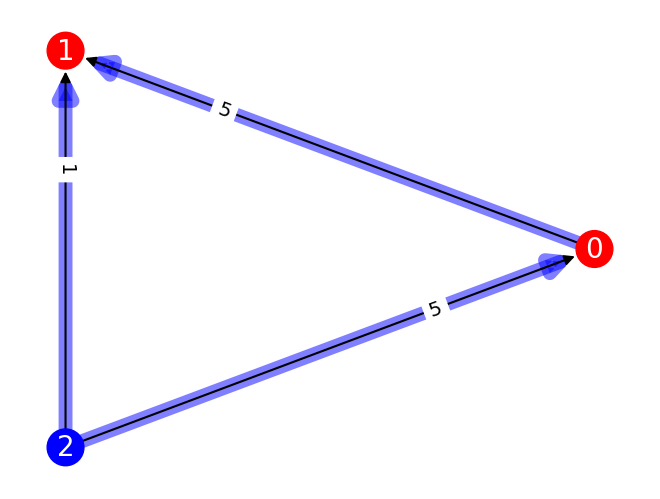

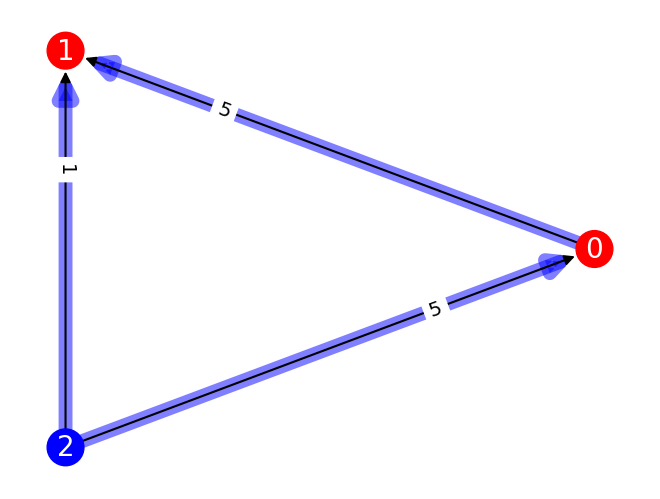

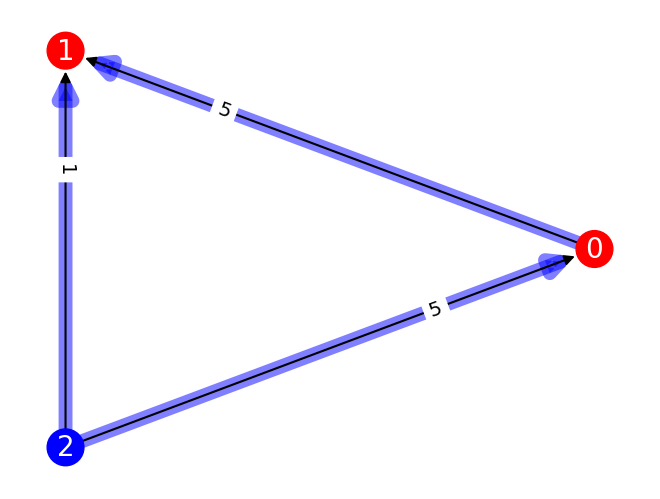

In [19]:
prof = Profile([
    [a, b, c],[b, c, a], [c, a, b]
], rcounts=[2, 2, 5])

prof.margin_graph().display_with_defeat(beat_path_defeat(prof))

prof.margin_graph().display_with_defeat(uc_gill_defeat(prof))

prof.margin_graph().display_with_defeat(split_cycle_defeat(prof))

### Stable Voting is a refinment  of Split Cycle 


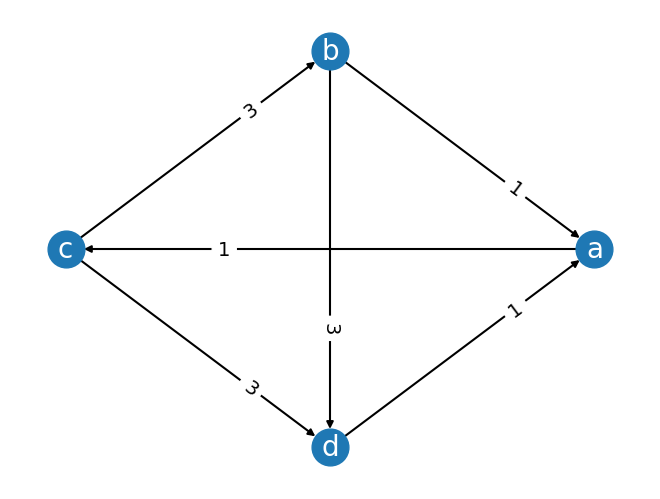

Split Cycle winners are {a, c}
Stable Voting winner is {c}

Ranked Pairs winners are {a, c}
Beat Path winners are {a, c}


In [21]:
cmap = cmap_abcd
prof = Profile(
    [ 
        [b, d, a, c],
        [a, c, b, d],
        [c, b, d, a],
        [c, d, b, a]
    ],
    [1, 2, 1, 1],
    cmap = cmap
)

prof.display_margin_graph()

split_cycle.display(prof)
stable_voting.display(prof)
print()
ranked_pairs.display(prof)
beat_path.display(prof)


## Section 4 Spoilers, Stealers and Stability


### Spoilers, Stealers and Condorcetian Candidates

In [22]:
## Spoilers

def is_spoiler(pot_spoiler, cand, edata, vm): 
    """
    Definition 4.1.1: Returns True if pot_spoiler spoiles the elections for cand 
    in the election edata according to the voting method vm. 
    """
    candidates = edata.candidates
    ws = vm(edata)    
    ws_minus = vm(edata, curr_cands = [c for c in candidates if c != pot_spoiler])
    
    return cand in ws_minus and edata.margin(cand, pot_spoiler) > 0 and cand not in ws and pot_spoiler not in ws 


def find_spoilers(vm, cand, edata, cmap=None): 
    """
    Find and display all the spoilers for candidate cand in edata for the voting method vm.
    """
    candidates = edata.candidates
    
    cmap = cmap if cmap is not None else edata.cmap
    found = False
    
    ws = vm(edata)
    
    for c in edata.dominates(cand):  # cand is majority preferred to c
        ws_minus = vm(edata, curr_cands = [_c for _c in candidates if _c != c])
        if cand in ws_minus and cand not in ws and c not in ws: 
            print(f"\t{cmap[c]} spoils the election for {cmap[cand]}")
            print(f"\t{cmap[cand]} is a winner in the election without {cmap[c]} (the winners are {display_cands(ws_minus, cmap)})")
            print(f"\tthe margin of {cmap[cand]} over {cmap[c]} is {edata.margin(cand, c)}")
            print(f"\tniether {cmap[cand]} nor {cmap[c]} are winners (the winners are {display_cands(ws, cmap)})")
            found = True
            
    if not found: 
        print(f"\t{cmap[cand]} does not have any spoilers")

## Stealers

def is_stealer(pot_stealer, cand, edata, vm): 
    """
    Definition 4.1.2: Returns True if pot_stealer spoiles the elections from cand 
    in the election edata according to the voting method vm. 
    """
    
    candidates = edata.candidates
        
    ws = vm(edata)    
    ws_minus = vm(edata, curr_cands = [c for c in candidates if c != pot_stealer])
        
    return cand in ws_minus and edata.margin(cand, pot_stealer) > 0 and cand not in ws and pot_stealer in ws 


def find_stealers(vm, cand, edata, cmap=None): 
    """
    Find and display all the stealers for candidate cand in edata for the voting method vm.
    """
    
    cmap = cmap if cmap is not None else edata.cmap
    
    candidates = edata.candidates
    found = False
    
    ws = vm(edata)
    
    for c in edata.dominates(cand):  # cand is majority preferred to c
        ws_minus = vm(edata, curr_cands = [_c for _c in candidates if _c != c])
        if cand in ws_minus and cand not in ws and c in ws: 
            print(f"\t{cmap[c]} steals the election from {cmap[cand]}")
            print(f"\t{cmap[cand]} is a winner in the election without {cmap[c]} (the winners are {display_cands(ws_minus, cmap)})")
            print(f"\tthe margin of {cmap[cand]} over {cmap[c]} is {edata.margin(cand, c)}")
            print(f"\t{cmap[cand]} is not a winner but {cmap[c]} is a winner in the election (the winners are {display_cands(ws, cmap)})")
            found = True
            
    if not found: 
        print(f"\t{cmap[cand]} does not have any stealers")

## Condorcetian Candidates

def is_condorcetian(vm, cand, edata): 
    """
    Definition 4.4: Return True if cand is Condorcetian in edata according to vm
    """
    candidates = edata.candidates
    
    for c in edata.dominates(cand): # cand is majority preferred to c
        ws_minus = vm(edata, curr_cands = [_c for _c in candidates if _c != c])
        if cand in ws_minus: 
            return True
    return False


def find_condorcetian_witnesses(vm, cand, edata, cmap=None): 
    """
    Find and display all witnesses showing that cand is a Condorcetian candidate in edata according to vm.
    """
    
    cmap = cmap if cmap is not None else edata.cmap

    candidates = edata.candidates
    found = False
    
    for c in edata.dominates(cand):  # cand is majority preferred to c
        ws_minus = vm(edata, curr_cands = [_c for _c in candidates if _c != c])
        if cand in ws_minus: 
            print(f"\t{cmap[cand]} is a winner in the election without {cmap[c]} (the winners are {display_cands(ws_minus, cmap)})")
            print(f"\tthe margin of {cmap[cand]} over {cmap[c]} is {edata.margin(cand, c)}")
            found = True
            
    if not found: 
        print(f"\t{cmap[cand]} is not a Condorcetian candidate.")

        
def is_weak_condorcetian(vm, cand, edata): 
    """
    Definition 4.4: Return True if cand is weak Condorcetian in edata according to vm
    """
    
    candidates = edata.candidates
    
    for c in edata.candidates:
        if edata.majority_prefers(cand, c) or edata.is_tied(cand, c):
            ws_minus = vm(edata, curr_cands = [_c for _c in candidates if _c != c])
            if cand in ws_minus: 
                return True        
    return False


def find_weak_condorcetian_witnesses(vm, cand, edata): 
    """
    Find and display all witnesses showing that cand is a weak Condorcetian candidate in edata according to vm.
    """
    
    candidates = edata.candidates
    found = False
    
    for c in edata.candidates:  
        if edata.margin(cand, c) >= 0:
            ws_minus = vm(edata, curr_cands = [_c for _c in candidates if _c != c])
            if cand in ws_minus: 
                print(f"\t{cmap[cand]} is a winner in the election without {cmap[c]} (the winners are {display_cands(ws_minus, cmap)})")
                print(f"\tThe margin of {cmap[cand]} over {cmap[c]} is {edata.margin(cand, c)}")
                found = True
            
    if not found: 
        print(f"\t{cand} does not have a majoritarian claim")




### Example 4.6


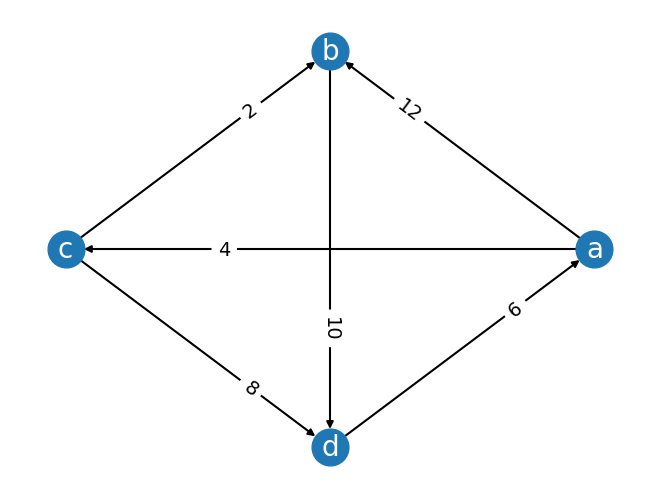

Split Cycle winners are {a, c}
The Condorcetian candidates for Split Cycle: {a, c}
	a is a winner in the election without c (the winners are {a})
	the margin of a over c is 4

	c is a winner in the election without b (the winners are {c})
	the margin of c over b is 2

Beat Path winner is {c}
The Condorcetian candidates for Beat Path: {a, c}
	a is a winner in the election without c (the winners are {a})
	the margin of a over c is 4

	c is a winner in the election without b (the winners are {c})
	the margin of c over b is 2

Ranked Pairs winner is {a}
The Condorcetian candidates for Ranked Pairs: {a, c}
	a is a winner in the election without c (the winners are {a})
	the margin of a over c is 4

	c is a winner in the election without b (the winners are {c})
	the margin of c over b is 2



In [23]:

cmap = cmap_abcd
mg = MarginGraph(
    [a, b, c, d],
    [
        (c, b, 2),
        (a, c, 4),
        (d, a, 6),
        (c, d, 8),
        (b, d, 10), 
        (a, b, 12)
    ],
    cmap = cmap
)

mg.display()


vm = split_cycle
condorcetian_candidates = [cand for cand in mg.candidates if is_condorcetian(vm, cand, mg)]
vm.display(mg)
print(f"The Condorcetian candidates for {vm.name}: {display_cands(condorcetian_candidates, cmap=cmap)}")
for cand in condorcetian_candidates: 
    find_condorcetian_witnesses(vm, cand, mg)
    print()
    
vm = beat_path
vm.display(mg)
condorcetian_candidates = [cand for cand in mg.candidates if is_condorcetian(vm, cand, mg)]
print(f"The Condorcetian candidates for {vm.name}: {display_cands(condorcetian_candidates, cmap=cmap)}")
for cand in condorcetian_candidates: 
    find_condorcetian_witnesses(vm, cand, mg)
    print()
    
vm = ranked_pairs
vm.display(mg)
condorcetian_candidates = [cand for cand in mg.candidates if is_condorcetian(vm, cand, mg)]
print(f"The Condorcetian candidates for {vm.name}: {display_cands(condorcetian_candidates, cmap=cmap)}")
for cand in condorcetian_candidates: 
    find_condorcetian_witnesses(vm, cand, mg)
    print()

### (Partial) Immunity to Spoilers

In [24]:

def has_immunity_to_spoilers_violation(vm, edata): 
    """
    Definition 4.2.1: Return True if there is an a and b such that b is a spoiler for a in edata using vm.
    """
    
    candidates = edata.candidates
    
    for cand in candidates:  
        for pot_spoiler in edata.dominates(cand): # cand is majority preferred to pot_spoiler
            if is_spoiler(pot_spoiler, cand, edata, vm):
                return True
    return False


def find_immunity_to_spoilers_violation(vm, edata, cmap=None): 
    """
    Find and display the immunity to spoilers violations.
    """
    
    cmap = cmap if cmap is not None else edata.cmap
    candidates = edata.candidates
    
    found = False
    for cand in candidates:  
        for pot_spoiler in edata.dominates(cand): # cand is majority preferred to pot_spoiler
            if is_spoiler(pot_spoiler, cand, edata, vm):
                found = True
                print(f"{cmap[pot_spoiler]} spoils the election for {cmap[cand]}")
                find_spoilers(vm, cand, edata, cmap=cmap)
                print()
    if not found: 
        print("There is no immunity to spoilers violation.")

def has_partial_immunity_to_spoilers_violation(vm, edata, condorcetian_candidates = None): 
    """
    Definition 4.8.1: Return True if there is an a and b such that 
    a is the unique Condorcetian candidate  and b is a spoiler for a in edata using vm.
    """
    
    candidates = edata.candidates
    
    if condorcetian_candidates is None: 
        condorcetian_candidates = [c for c in candidates if is_condorcetian(vm, c, edata)]
            
    return len(condorcetian_candidates) == 1 and any([is_spoiler(b, condorcetian_candidates[0], edata, vm) for b in edata.candidates])


def find_partial_immunity_to_spoilers_violation(vm, edata, condorcetian_candidates=None, cmap=None): 
    """
    Find and display the partial immunity to spoilers violations.
    """
    
    cmap = cmap if cmap is not None else edata.cmap
    candidates = edata.candidates
    
    if condorcetian_candidates is None: 
        condorcetian_candidates = [c for c in candidates if is_condorcetian(vm, c, edata)]
    
    if len(condorcetian_candidates) == 1: 
        found = False
        ccand = condorcetian_candidates[0]
        print(f"The unique Condorcetian candidate is {cmap[ccand]}")
        for pot_spoiler in edata.dominates(ccand): # ccand is majority preferred to pot_spoiler
            if is_spoiler(pot_spoiler, ccand, edata, vm):
                found = True
                find_spoilers(vm, ccand, edata, cmap=cmap)
                print()        
        if not found: 
            print(f"There is no partial immunity to spoilers vioalation: There are no spoilers for {cmap[ccand]}")
    else:
        print(f"There is no partial immunity to spoilers vioalation: The Condorcetian candidates are {display_cands(condorcetian_candidates, cmap)}")


### Proposition 4.10

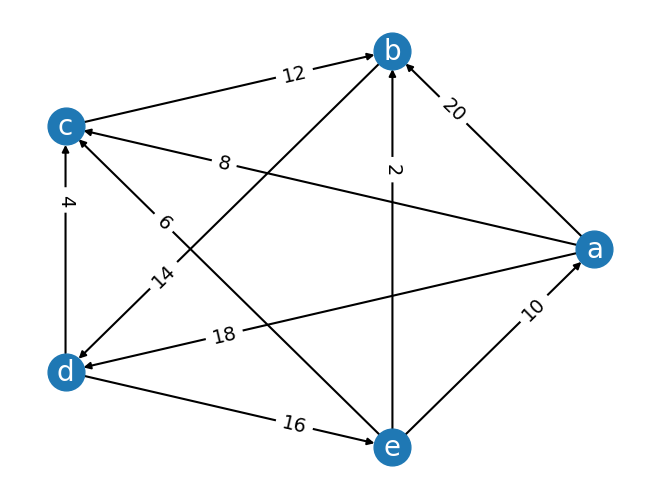

Beat Path winner is {c}
The unique Condorcetian candidate is a
	b spoils the election for a
	a is a winner in the election without b (the winners are {a})
	the margin of a over b is 20
	niether a nor b are winners (the winners are {c})


Split Cycle winners are {a, c}
The unique Condorcetian candidate is a
There is no partial immunity to spoilers vioalation: There are no spoilers for a

Ranked Pairs winner is {a}
The unique Condorcetian candidate is a
There is no partial immunity to spoilers vioalation: There are no spoilers for a

Minimax winner is {c}
There is no partial immunity to spoilers vioalation: The Condorcetian candidates are {a, c}

Stable Voting winner is {a}
The unique Condorcetian candidate is a
There is no partial immunity to spoilers vioalation: There are no spoilers for a

The margin graph without b: 


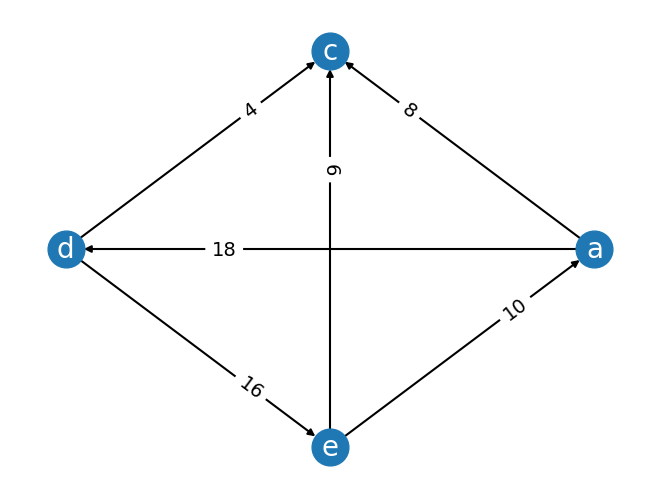

The Condorcet loser in the election without b is c
Split Cycle winner is {a}
Ranked Pairs winner is {a}
Minimax winner is {c}
Stable Voting winner is {a}


In [25]:
cmap = cmap_abcde

mg = MarginGraph(
    [a, b, c, d, e],
    [
        (e, b, 2), 
        (d, c, 4), 
        (e, c, 6), 
        (a, c, 8), 
        (e, a, 10), 
        (c, b, 12),
        (b, d, 14),
        (d, e, 16),
        (a, d, 18),
        (a, b, 20)
    ],
    cmap=cmap
)

mg.display()
beat_path.display(mg)
find_partial_immunity_to_spoilers_violation(beat_path, mg)
print()
split_cycle.display(mg)
find_partial_immunity_to_spoilers_violation(split_cycle, mg)
print()
ranked_pairs.display(mg)
find_partial_immunity_to_spoilers_violation(ranked_pairs, mg)
print()
minimax.display(mg)
find_partial_immunity_to_spoilers_violation(minimax, mg)
print()
stable_voting.display(mg)
find_partial_immunity_to_spoilers_violation(stable_voting, mg)
print()

print("The margin graph without b: ")
mg.display(curr_cands = [a, c, d, e])
print(f"The Condorcet loser in the election without b is {cmap[mg.condorcet_loser(curr_cands = [a, c, d, e])]}")

split_cycle.display(mg, curr_cands = [a, c, d, e])
ranked_pairs.display(mg, curr_cands = [a, c, d, e])
minimax.display(mg, curr_cands = [a, c, d, e])
stable_voting.display(mg, curr_cands = [a, c, d, e])

### Proposition 4.12

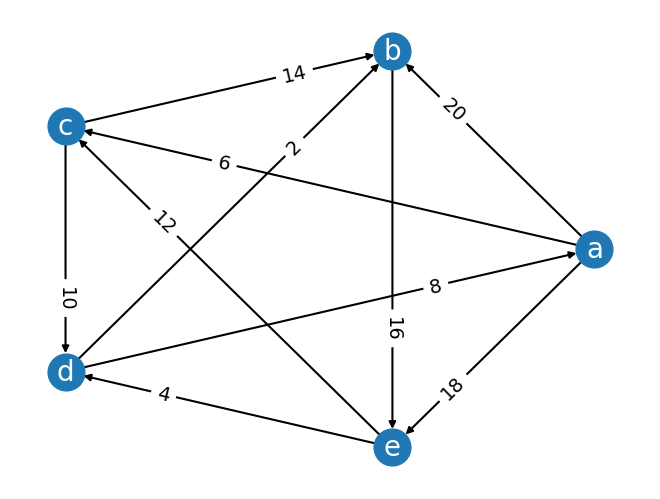

Ranked Pairs winner is {c}
The unique Condorcetian candidate is a
	b spoils the election for a
	a is a winner in the election without b (the winners are {a})
	the margin of a over b is 20
	niether a nor b are winners (the winners are {c})


Beat Path winner is {a}
The unique Condorcetian candidate is a
There is no partial immunity to spoilers vioalation: There are no spoilers for a

Split Cycle winners are {a, c}
The unique Condorcetian candidate is a
There is no partial immunity to spoilers vioalation: There are no spoilers for a

Minimax winner is {a}
There is no partial immunity to spoilers vioalation: The Condorcetian candidates are {a, d}

Stable Voting winner is {a}
The unique Condorcetian candidate is a
There is no partial immunity to spoilers vioalation: There are no spoilers for a

The margin graph without b: 


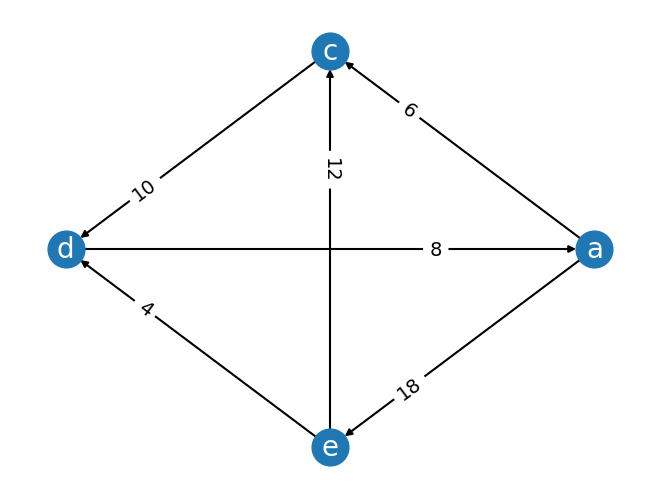

Split Cycle winner is {a}
Ranked Pairs winner is {a}
Minimax winner is {a}
Stable Voting winner is {a}


In [26]:
cmap = cmap_abcde

mg = MarginGraph(
    [a, b, c, d, e],
    [
        (d, b, 2), 
        (e, d, 4), 
        (a, c, 6), 
        (d, a, 8), 
        (c, d, 10), 
        (e, c, 12),
        (c, b, 14),
        (b, e, 16),
        (a, e, 18), 
        (a, b, 20)
    ],
    cmap=cmap
)

mg.display()
ranked_pairs.display(mg)
find_partial_immunity_to_spoilers_violation(ranked_pairs, mg)

print()
beat_path.display(mg)
find_partial_immunity_to_spoilers_violation(beat_path, mg)
print()
split_cycle.display(mg)
find_partial_immunity_to_spoilers_violation(split_cycle, mg)
print()
minimax.display(mg)
find_partial_immunity_to_spoilers_violation(minimax, mg)
print()
stable_voting.display(mg)
find_partial_immunity_to_spoilers_violation(stable_voting, mg)
print()

print("The margin graph without b: ")
mg.display(curr_cands = [a, c, d, e])

split_cycle.display(mg, curr_cands = [a, c, d, e])
ranked_pairs.display(mg, curr_cands = [a, c, d, e])
minimax.display(mg, curr_cands = [a, c, d, e])
stable_voting.display(mg, curr_cands = [a, c, d, e])

### (Partial) Immunity to Stealers

In [27]:
      
def has_immunity_to_stealers_violation(vm, edata): 
    """
    Definition 4.2.2: Return True if there is an a and b such that b steals the election from a in edata using vm.
    """    
    candidates = edata.candidates
    
    for cand in candidates:  
        for pot_stealer in edata.dominates(cand): # cand is majority preferred to pot_stealer
            if is_stealer(pot_stealer, cand, edata, vm):
                return True
    return False

def find_immunity_to_stealers_violation(vm, edata, cmap=None): 
    """
    Find and display the immunity to stealers violations.
    """
    
    cmap = cmap if cmap is not None else edata.cmap
    candidates = edata.candidates
    
    found = False
    for cand in candidates:  
        for pot_stealer in edata.dominates(cand): # cand is majority preferred to pot_spoiler
            if is_stealer(pot_stealer, cand, edata, vm):
                found = True
                find_stealers(vm, cand, edata, cmap=cmap)
                print()
    if not found: 
        print("There is no immunity to stealers violation.")

def has_partial_immunity_to_stealers_violation(vm, edata, condorcetian_candidates = None): 
    """
    Definition 4.8.1: Return True if there is an a and b such that 
    a is the unique condorcetian candidate and b steals the election from a in edata using vm.
    """
    
    candidates = edata.candidates
    
    if condorcetian_candidates is None: 
        condorcetian_candidates = [c for c in candidates if is_condorcetian(vm, c, edata)]
            
    return len(condorcetian_candidates) == 1 and any([is_stealer(b, condorcetian_candidates[0], edata, vm) for b in edata.candidates])

def find_partial_immunity_to_stealers_violation(vm, edata, condorcetian_candidates=None, cmap=None): 
    """
    Find and display the partial immunity to spoilers violations.
    """
    
    cmap = cmap if cmap is not None else edata.cmap
    candidates = edata.candidates
    
    if condorcetian_candidates is None: 
        condorcetian_candidates = [c for c in candidates if is_condorcetian(vm, c, edata)]
    
    if len(condorcetian_candidates) == 1: 
        found = False
        ccand = condorcetian_candidates[0]
        print(f"The unique Condorcetian candidate is {cmap[ccand]}")
        for pot_stealer in edata.dominates(ccand): # ccand is majority preferred to pot_stealer
            if is_stealer(pot_stealer, ccand, edata, vm):
                found = True
                find_stealers(vm, ccand, edata, cmap=cmap)
                print()        
        if not found: 
            print(f"There is no partial immunity to stealers vioalation: There are no stealers for {cmap[ccand]}")
    else:
        print(f"There is no partial immunity to stealers vioalation: The Condorcetian candidates are {display_cands(condorcetian_candidates, cmap)}")


### Proposition 4.14



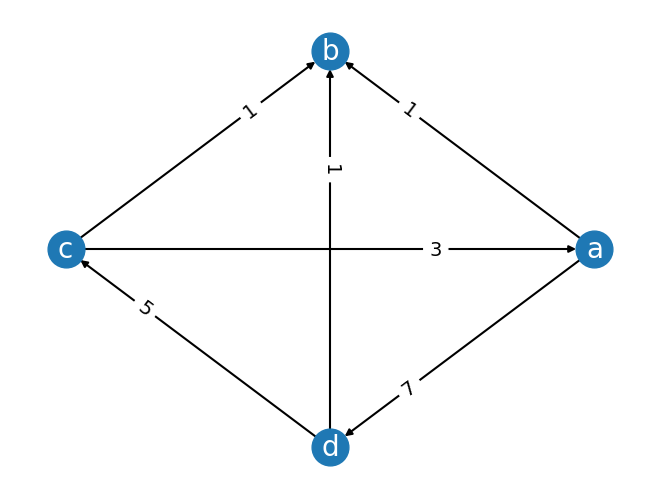

Minimax winner is {b}
The unique Condorcetian candidate is a
	b steals the election from a
	a is a winner in the election without b (the winners are {a})
	the margin of a over b is 1
	a is not a winner but b is a winner in the election (the winners are {b})


Beat Path winner is {a}
The unique Condorcetian candidate is a
There is no partial immunity to stealers vioalation: There are no stealers for a

Split Cycle winner is {a}
The unique Condorcetian candidate is a
There is no partial immunity to stealers vioalation: There are no stealers for a

Ranked Pairs winner is {a}
The unique Condorcetian candidate is a
There is no partial immunity to stealers vioalation: There are no stealers for a

Stable Voting winner is {a}
The unique Condorcetian candidate is a
There is no partial immunity to stealers vioalation: There are no stealers for a

The margin graph without b: 


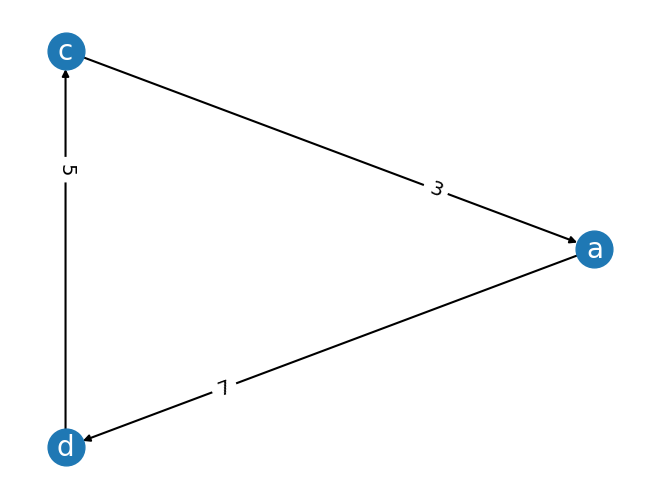

Split Cycle winner is {a}
Ranked Pairs winner is {a}
Minimax winner is {a}
Stable Voting winner is {a}


In [28]:
cmap = cmap_abcd

mg = MarginGraph(
    [a, b, c, d],
    [
        (a, b, 1), 
        (c, b, 1), 
        (d, b, 1), 
        (c, a, 3), 
        (d, c, 5), 
        (a, d, 7)
    ],
    cmap=cmap
)

mg.display()
minimax.display(mg)
find_partial_immunity_to_stealers_violation(minimax, mg)

print()
beat_path.display(mg)
find_partial_immunity_to_stealers_violation(beat_path, mg)
print()
split_cycle.display(mg)
find_partial_immunity_to_stealers_violation(split_cycle, mg)
print()
ranked_pairs.display(mg)
find_partial_immunity_to_stealers_violation(ranked_pairs, mg)
print()
stable_voting.display(mg)
find_partial_immunity_to_stealers_violation(stable_voting, mg)
print()

print("The margin graph without b: ")
mg.display(curr_cands = [a, c, d])

split_cycle.display(mg, curr_cands = [a, c, d])
ranked_pairs.display(mg, curr_cands = [a, c, d])
minimax.display(mg, curr_cands = [a, c, d])
stable_voting.display(mg, curr_cands = [a, c, d])

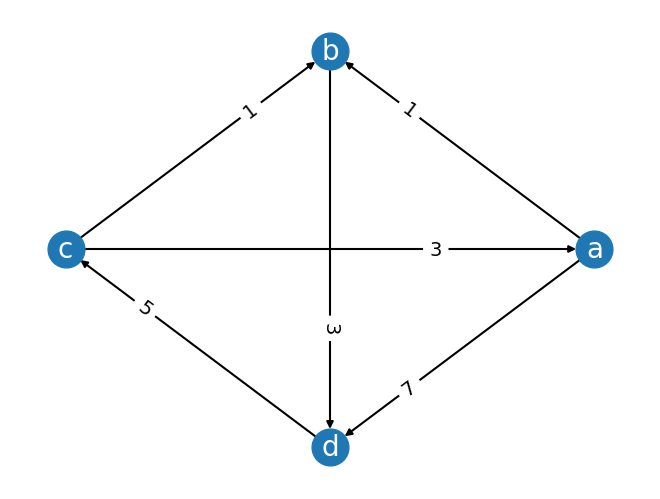

Beat Path winner is {b}
The unique Condorcetian candidate is a
	b steals the election from a
	a is a winner in the election without b (the winners are {a})
	the margin of a over b is 1
	a is not a winner but b is a winner in the election (the winners are {b})


Minimax winner is {b}
There is no partial immunity to stealers vioalation: The Condorcetian candidates are {a, b}

Split Cycle winners are {a, b}
The unique Condorcetian candidate is a
There is no partial immunity to stealers vioalation: There are no stealers for a

Ranked Pairs winner is {a}
The unique Condorcetian candidate is a
There is no partial immunity to stealers vioalation: There are no stealers for a

Stable Voting winner is {a}
The unique Condorcetian candidate is a
There is no partial immunity to stealers vioalation: There are no stealers for a

The margin graph without b: 


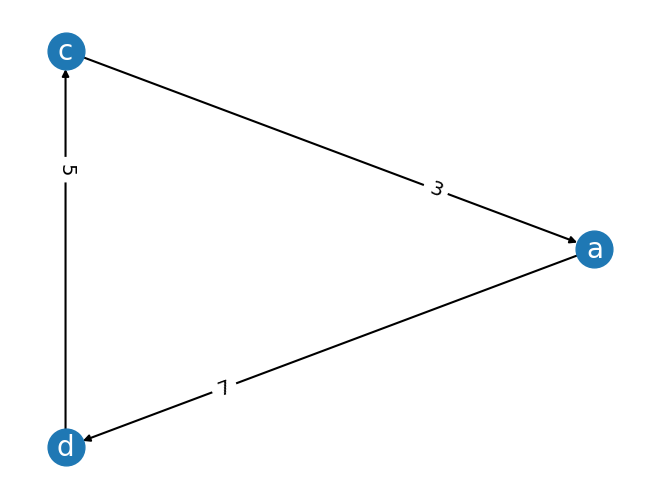

Split Cycle winner is {a}
Ranked Pairs winner is {a}
Minimax winner is {a}
Stable Voting winner is {a}


In [29]:
cmap = cmap_abcd

mg = MarginGraph(
    [a, b, c, d],
    [
        (a, b, 1), 
        (c, b, 1), 
        (b, d, 3), 
        (c, a, 3), 
        (d, c, 5), 
        (a, d, 7)
    ],
    cmap=cmap
)

mg.display()

beat_path.display(mg)
find_partial_immunity_to_stealers_violation(beat_path, mg)
print()
minimax.display(mg)
find_partial_immunity_to_stealers_violation(minimax, mg)
print()
split_cycle.display(mg)
find_partial_immunity_to_stealers_violation(split_cycle, mg)
print()
ranked_pairs.display(mg)
find_partial_immunity_to_stealers_violation(ranked_pairs, mg)
print()
stable_voting.display(mg)
find_partial_immunity_to_stealers_violation(stable_voting, mg)
print()

print("The margin graph without b: ")
mg.display(curr_cands = [a, c, d])

split_cycle.display(mg, curr_cands = [a, c, d])
ranked_pairs.display(mg, curr_cands = [a, c, d])
minimax.display(mg, curr_cands = [a, c, d])
stable_voting.display(mg, curr_cands = [a, c, d])

### Proposition 4.15

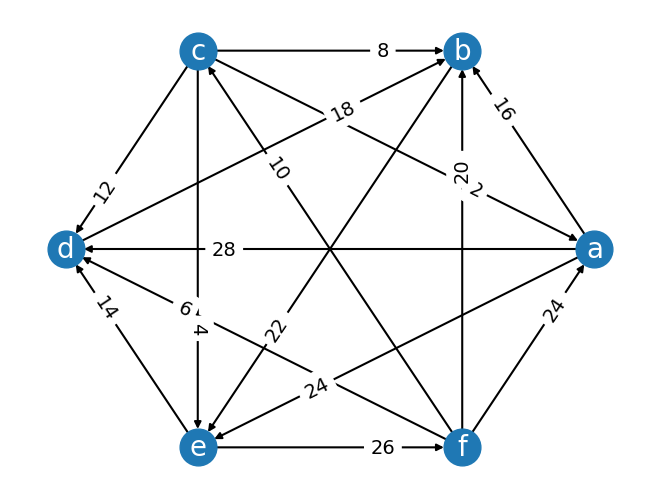

Ranked Pairs winners are {b, c}
The Condorcetian candidates are {a, c}
	b steals the election from a
	a is a winner in the election without b (the winners are {a, e})
	the margin of a over b is 16
	a is not a winner but b is a winner in the election (the winners are {b, c})


Beat Path winner is {c}
The Condorcetian candidates are {a, c}
There is no immunity to stealers violation.

Minimax winner is {c}
The Condorcetian candidates are {c}
There is no immunity to stealers violation.

Split Cycle winners are {a, b, c}
The Condorcetian candidates are {a, c}
There is no immunity to stealers violation.

Stable Voting winner is {a}
The Condorcetian candidates are {a, c}
	a steals the election from c
	c is a winner in the election without a (the winners are {c})
	the margin of c over a is 2
	c is not a winner but a is a winner in the election (the winners are {a})


The margin graph without b: 


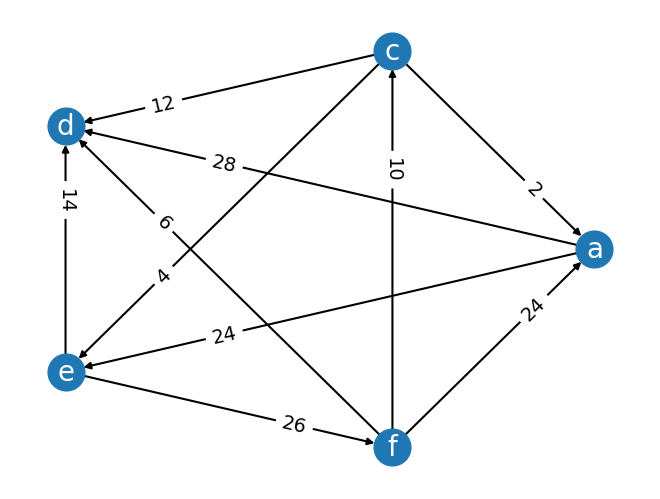

Split Cycle winners are {a, e}
Ranked Pairs winners are {a, e}
Minimax winner is {c}
Stable Voting winner is {a}


In [30]:


cmap = cmap_abcdef

mg = MarginGraph(
    [a, b, c, d, e, f],
    [
        (c, a, 2), 
        (c, e, 4), 
        (f, d, 6), 
        (c, b, 8), 
        (f, c, 10), 
        (c, d, 12), 
        (e, d, 14), 
        (a, b, 16), 
        (d, b, 18), 
        (f, b, 20), 
        (b, e, 22), 
        (f, a, 24),
        (a, e, 24), 
        (e, f, 26), 
        (a, d, 28) 
    ],
    cmap=cmap
)

mg.display()

ranked_pairs.display(mg)
condorcetian_candidates = [cand for cand in mg.candidates if is_condorcetian(ranked_pairs, cand, mg)]
print(f"The Condorcetian candidates are {display_cands(condorcetian_candidates, cmap)}")
find_immunity_to_stealers_violation(ranked_pairs, mg)
print()
beat_path.display(mg)
condorcetian_candidates = [cand for cand in mg.candidates if is_condorcetian(beat_path, cand, mg)]
print(f"The Condorcetian candidates are {display_cands(condorcetian_candidates, cmap)}")
find_immunity_to_stealers_violation(beat_path, mg)
print()
minimax.display(mg)
condorcetian_candidates = [cand for cand in mg.candidates if is_condorcetian(minimax, cand, mg)]
print(f"The Condorcetian candidates are {display_cands(condorcetian_candidates, cmap)}")
find_immunity_to_stealers_violation(minimax, mg)
print()
split_cycle.display(mg)
condorcetian_candidates = [cand for cand in mg.candidates if is_condorcetian(split_cycle, cand, mg)]
print(f"The Condorcetian candidates are {display_cands(condorcetian_candidates, cmap)}")
find_immunity_to_stealers_violation(split_cycle, mg)
print()
stable_voting.display(mg)
condorcetian_candidates = [cand for cand in mg.candidates if is_condorcetian(stable_voting, cand, mg)]
print(f"The Condorcetian candidates are {display_cands(condorcetian_candidates, cmap)}")
find_immunity_to_stealers_violation(stable_voting, mg)
print()

print("The margin graph without b: ")
mg.display(curr_cands = [a, c, d, e, f])

split_cycle.display(mg, curr_cands = [a, c, d, e, f])
ranked_pairs.display(mg, curr_cands = [a, c, d, e, f])
minimax.display(mg, curr_cands = [a, c, d, e, f])
stable_voting.display(mg, curr_cands = [a, c, d, e, f])
    

### (Partial) Stability for Winners

In [31]:
        
def has_stability_for_winners_violation(vm, edata, condorcetian_candidates = None): 
    """
    Definition 4.2.3: Return True if there are candidates a and b such that
      1. a in a winner according to vm in edata without b in the election, 
      2. a is majority preferred to b, and 
      3. a is not a winner in edata
    
    This is equivalent to requiring that all Condorcetian candidates are winners in edata according to vm. 
    """
    candidates = edata.candidates
    
    if condorcetian_candidates is None: 
        condorcetian_candidates = [c for c in candidates if is_condorcetian(vm, c, edata)]
    
    ws = vm(edata)
        
    return not set(condorcetian_candidates).issubset(set(ws))

def has_strong_stability_for_winners_violation(vm, edata, weak_condorcetian_candidates = None): 
    """
    Definition 4.2.3: Return True if there are candidates a and b such that
      1. a in a winner according to vm in edata without b in the election, 
      2. a is majority preferred to b or tied with b, and 
      3. a is not a winner in edata
    
    This is equivalent to requiring that all weak Condorcetian candidates are winners in edata according to vm. 
    """
    candidates = edata.candidates
    
    if weak_condorcetian_candidates is None: 
        weak_condorcetian_candidates = [c for c in candidates if is_weak_condorcetian(vm, c, edata)]
    
    ws = vm(edata)
        
    return not set(weak_condorcetian_candidates).issubset(set(ws))

def find_stability_for_winners_violation(vm, edata, condorcetian_candidates=None, cmap=None): 
    """
    Find and display any stability for winners violations. 
    """
    
    cmap = cmap if cmap is not None else edata.cmap

    candidates = edata.candidates
    
    if condorcetian_candidates is None: 
        condorcetian_candidates = [c for c in candidates if is_condorcetian(vm, c, edata)]
    
    ws = vm(edata)
        
    print(f"The winners are {display_cand(ws, cmap)}")
    found = False
    for c in condorcetian_candidates: 
        
        if c not in ws: 
            print(f"{cmap[c]} is a Condorcetian candidate")
            find_condorcetian_witnesses(vm, c, edata, cmap=cmap)
            found = True
            
    if not found: 
        print(f"There is no Stability for Winners violation")
        print(f"The Condorcetian candidates are {display_cand(condorcetian_candidates, cmap)}")


def has_partial_stability_for_winners_violation(vm, edata, condorcetian_candidates = None): 
    
    candidates = edata.candidates
    
    if condorcetian_candidates is None: 
        condorcetian_candidates = [c for c in candidates if is_condorcetian(vm, c, edata)]
    
    ws = vm(edata)
        
    return len(condorcetian_candidates) == 1 and condorcetian_candidates[0] not in ws


### Stability for Winners with Tiebreaking

In [32]:

def has_stability_for_winners_with_tiebreaking_violation(vm, edata, condorcetian_candidates = None): 
    
    candidates = edata.candidates
    
    if condorcetian_candidates is None: 
        condorcetian_candidates = [c for c in candidates if is_condorcetian(vm, c, edata)]
        
    ws = vm(edata)
        
    return len(condorcetian_candidates) > 0 and not set(ws).issubset(set(condorcetian_candidates))

def find_stability_for_winners_with_tiebreaking_violation(vm, edata, condorcetian_candidates=None, cmap=None): 
    """
    Find and display any stability for winners violations. 
    """
    
    cmap = cmap if cmap is not None else edata.cmap

    candidates = edata.candidates
    
    if condorcetian_candidates is None: 
        condorcetian_candidates = [c for c in candidates if is_condorcetian(vm, c, edata)]
    
    ws = vm(edata)
        
    print(f"The winners are {display_cands(ws, cmap)} and the Condorcetian candidates are: {display_cands(condorcetian_candidates, cmap=cmap)}")
    for c in condorcetian_candidates: 
        find_condorcetian_witnesses(vm, c, edata, cmap=cmap)
    found = False
    for c in ws: 
        if c not in condorcetian_candidates: 
            print(f"{cmap[c]} is a winner, but not a Condorcetian candidate")
            found = True
    if not found: 
        print(f"There is no Stability for Winners with Tiebreaking violation")


### Proposition 4.18

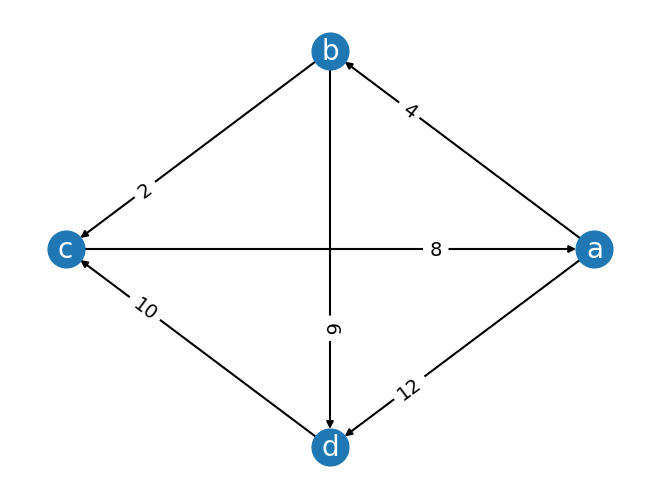

Split Cycle winners are {a, b}
The winners are {a, b} and the Condorcetian candidates are: {a}
	a is a winner in the election without b (the winners are {a})
	the margin of a over b is 4
b is a winner, but not a Condorcetian candidate

Beat Path winner is {b}
The winners are {b} and the Condorcetian candidates are: {a}
	a is a winner in the election without b (the winners are {a})
	the margin of a over b is 4
b is a winner, but not a Condorcetian candidate

Minimax winner is {b}
The winners are {b} and the Condorcetian candidates are: {a, b}
	a is a winner in the election without b (the winners are {a})
	the margin of a over b is 4
	b is a winner in the election without c (the winners are {b})
	the margin of b over c is 2
	b is a winner in the election without d (the winners are {b})
	the margin of b over d is 6
There is no Stability for Winners with Tiebreaking violation

Ranked Pairs winner is {a}
The winners are {a} and the Condorcetian candidates are: {a}
	a is a winner in the elec

In [33]:
cmap = cmap_abcd

mg = MarginGraph(
    [a, b, c, d],
    [
        (b, c, 2), 
        (a, b, 4), 
        (b, d, 6), 
        (c, a, 8), 
        (d, c, 10), 
        (a, d, 12)
    ],
    cmap=cmap
)

mg.display()

split_cycle.display(mg)
find_stability_for_winners_with_tiebreaking_violation(split_cycle, mg)
print()
beat_path.display(mg)
find_stability_for_winners_with_tiebreaking_violation(beat_path, mg)
print()

minimax.display(mg)
find_stability_for_winners_with_tiebreaking_violation(minimax, mg)
print()
ranked_pairs.display(mg)
find_stability_for_winners_with_tiebreaking_violation(ranked_pairs, mg)
print()
stable_voting.display(mg)
find_stability_for_winners_with_tiebreaking_violation(stable_voting, mg)
print()



## Expansion Consistency

In [34]:

def has_expansion_consistency_violation(vm, edata): 
    """
    Definition 4.22: Return True if there is a violation of expansion consistency for vm in edata
    """
    candidates = edata.candidates
    
    subsets = list(powerset(candidates))
    
    for x1 in subsets: 
        if len(x1) > 0: 
            for x2 in subsets: 
                if len(x2) > 0: 
                    if set(x1).union(set(x2)) == set(candidates): 
                        ws1 = vm(edata, curr_cands = list(x1))
                        ws2 = vm(edata, curr_cands = list(x2))
                        ws = vm(edata)
                        
                        if not set(ws1).intersection(set(ws2)).issubset(set(ws)): 
                            return True                    
    return False

    
def find_expansion_consistency_violations(vm, edata, cmap=None): 
    """
    Find and display an expansion consistency violation
    """
    
    cmap = cmap if cmap is not None else edata.cmap
    
    candidates = edata.candidates
    
    subsets = list(powerset(candidates))
    found = False
    for x1 in subsets: 
        if len(x1) > 0: 
            for x2 in subsets: 
                if len(x2) > 0: 
                    if set(x1).union(set(x2)) == set(candidates): 
                        ws1 = vm(edata, curr_cands = list(x1))
                        ws2 = vm(edata, curr_cands = list(x2))
                        ws = vm(edata)
                        
                        if not set(ws1).intersection(set(ws2)).issubset(set(ws)): 
                            found = True
                            print(f"Restricting to {display_cands(list(x1), cmap)}, the winners are {display_cands(ws1,cmap)}")                    
                            print(f"Restricting to {display_cands(list(x2), cmap)}, the winners are {display_cands(ws2, cmap)}")                    
                            print(f"In the full eleciton, the winners are {display_cands(ws, cmap)}")
                            print()
                            
    if not found: 
        print("There is no violation of expansion consisntency")


## Proposition 4.24

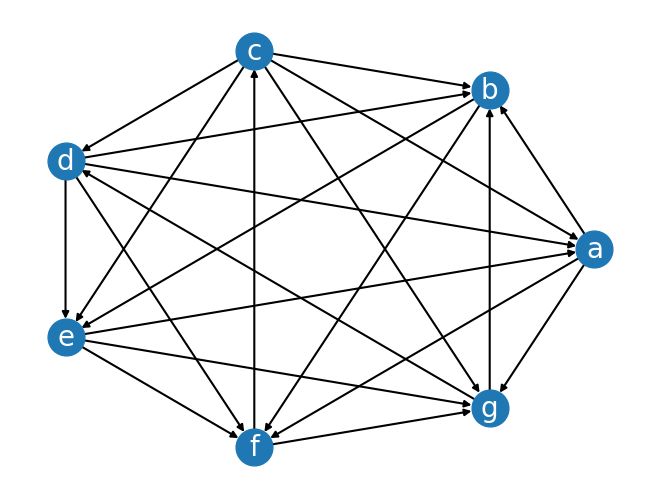

Banks winners are {c, d, e, f}
Restricting to a, b, c, e, f


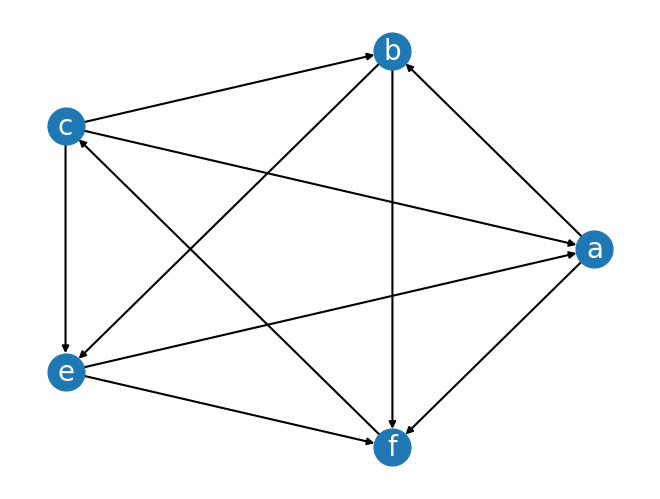

Banks winners are {a, b, c, e, f}
Restricting to a, d, f, g


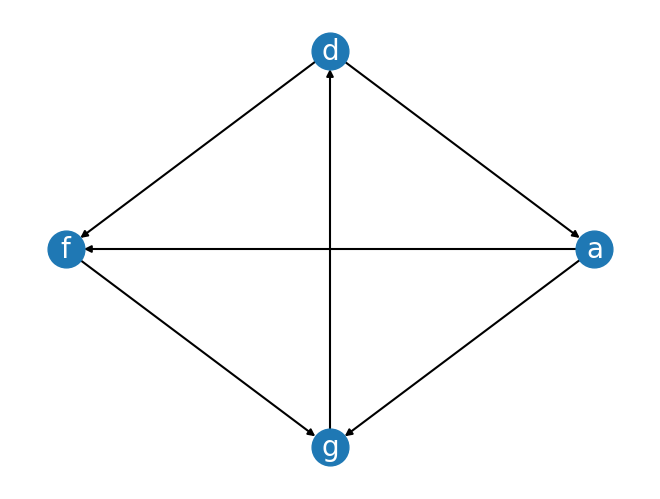

Banks winners are {a, d, g}

Expansion Consistency is satisfied: False

Strong Stability for Winners is satisfied: True


In [35]:
cmap = cmap_abcdefg

mg = MajorityGraph(
    [a, b, c, d, e, f, g],
    [
        (a, b),
        (a, f), 
        (a, g), 
        (b, e), 
        (b, f),
        (c, a),
        (c, b),
        (c, d), 
        (c, e), 
        (c, g),
        (d, a), 
        (d, b), 
        (d, e), 
        (d, f), 
        (e, a), 
        (e, f), 
        (e, g), 
        (f, c), 
        (f, g), 
        (g, b),
        (g, d),      
    ],
    cmap=cmap
)

mg.display()

banks.display(mg)
ws = banks(mg)

print("Restricting to a, b, c, e, f")
mg.display(curr_cands = [a, b, c, e, f])
banks.display(mg, curr_cands = [a, b, c, e, f])
ws1 = banks(mg, curr_cands = [a, b, c, e, f])

print("Restricting to a, d, f, g")

mg.display(curr_cands = [a, d, f, g])

banks.display(mg, curr_cands = [a, d, f, g])
ws2 = banks(mg, curr_cands = [a, d, f, g])

print(f"\nExpansion Consistency is satisfied: {set(ws1).intersection(set(ws2)).issubset(set(ws))}")
print(f"\nStrong Stability for Winners is satisfied: {not has_strong_stability_for_winners_violation(banks, mg)}")


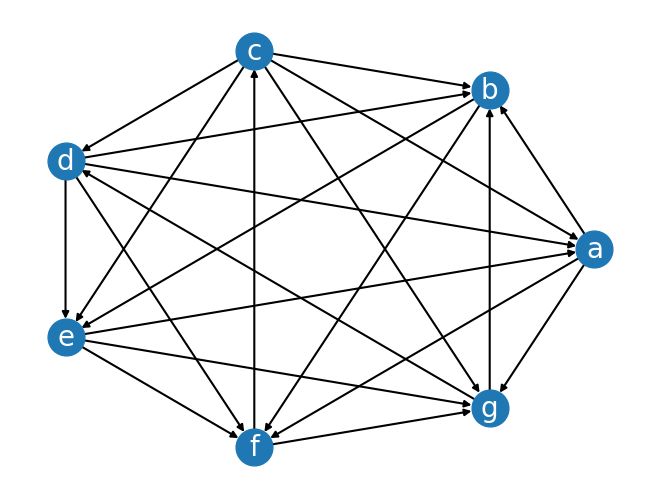


Expansion Consistency is satisfied: False


In [36]:

## There are multiple ways that Expansion Consistency is violated on the above majority graph

mg = MajorityGraph(
    [a, b, c, d, e, f, g],
    [
        (a, b),
        (a, f), 
        (a, g), 
        (b, e), 
        (b, f),
        (c, a),
        (c, b),
        (c, d), 
        (c, e), 
        (c, g),
        (d, a), 
        (d, b), 
        (d, e), 
        (d, f), 
        (e, a), 
        (e, f), 
        (e, g), 
        (f, c), 
        (f, g), 
        (g, b),
        (g, d),      
    ],
    cmap=cmap
)


mg.display()
print(f"\nExpansion Consistency is satisfied: {not has_expansion_consistency_violation(banks, mg)}")

### Uncomment to find all the ways that expansion consisntency is violated
## Warning --- takes about 2 minutes to run
#find_expansion_consistency_violations(banks, mg)

## Section 5.2: Dominance Criteria

### Proposition 5.16

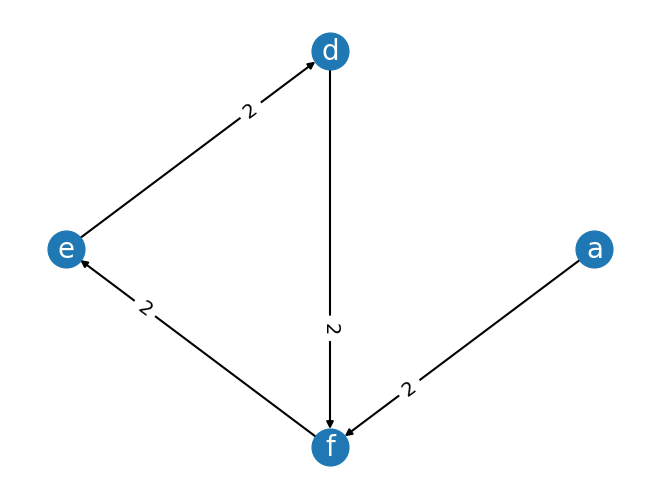

Split Cycle winners are {a, d, e}
Schwartz Set winner is {a}


In [37]:

mg = MarginGraph(
    [a, d, e, f], 
    [
        (a, f, 2), 
        (f, e, 2), 
        (e, d, 2), 
        (d, f, 2)
    ],
    cmap = cmap_abcdef
)

mg.display()

split_cycle.display(mg)
schwartz_set.display(mg)

## Section 5.4 Resoluteness Criteria

### Proposition 5.26

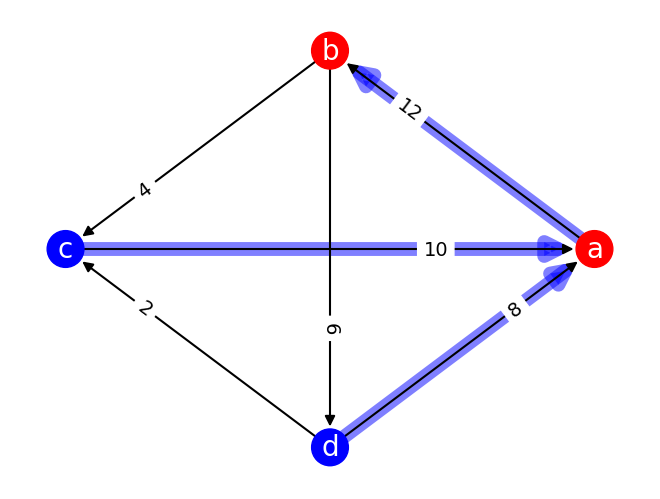

Split Cycle winners are {c, d}


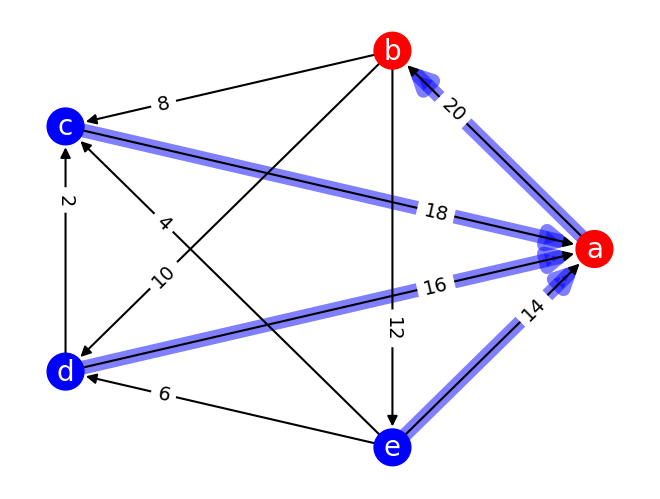

Split Cycle winners are {c, d, e}


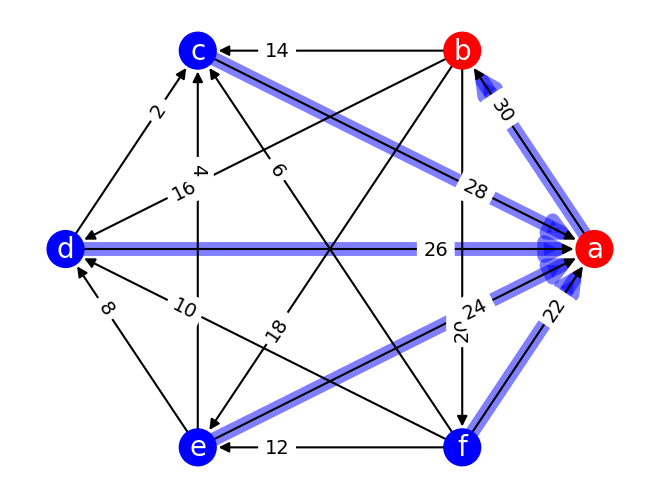

Split Cycle winners are {c, d, e, f}


In [38]:
cmap = cmap_abcd

mg = MarginGraph(
    [a, b, c, d],
    [
        (a, b, 12), 
        (b, c, 4), 
        (c, a, 10), 
        (d, a, 8), 
        (b, d, 6), 
        (d, c, 2)
        
    ],
    cmap=cmap
)

mg.display_with_defeat(split_cycle_defeat(mg))
split_cycle.display(mg)

cmap = cmap_abcde

mg = MarginGraph(
    [a, b, c, d, e],
    [
        (a, b, 20), 
        (b, c, 8), 
        (c, a, 18), 
        (d, a, 16), 
        (b, d, 10), 
        (d, c, 2),
        (e, a, 14),
        (b, e, 12), 
        (e, c, 4), 
        (e, d, 6)
        
    ],
    cmap=cmap
)

mg.display_with_defeat(split_cycle_defeat(mg))
split_cycle.display(mg)


cmap = cmap_abcdef

mg = MarginGraph(
    [a, b, c, d, e, f],
    [
        (a, b, 30), 
        (b, c, 14), 
        (c, a, 28), 
        (d, a, 26), 
        (b, d, 16), 
        (d, c, 2),
        (e, a, 24),
        (b, e, 18), 
        (e, c, 4), 
        (e, d, 8),
        (f, a, 22),
        (f, c, 6),
        (f, d, 10), 
        (f, e, 12),
        (b, f, 20),         
    ],
    cmap=cmap
)

mg.display_with_defeat(split_cycle_defeat(mg))
split_cycle.display(mg)




4 Candidates


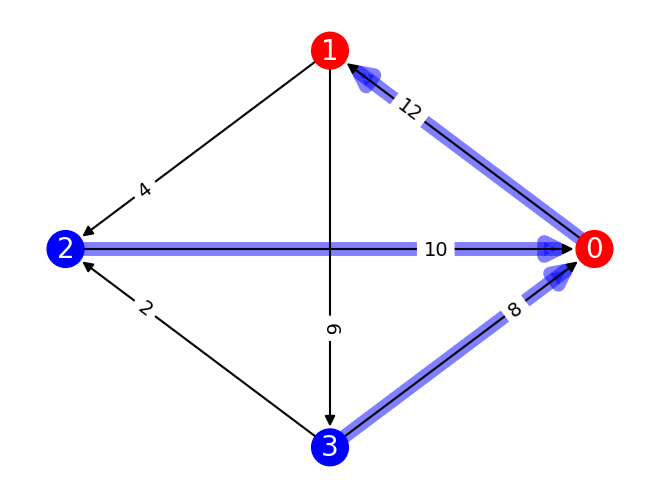

Split Cycle winners are {2, 3}
There are 2 winners


5 Candidates


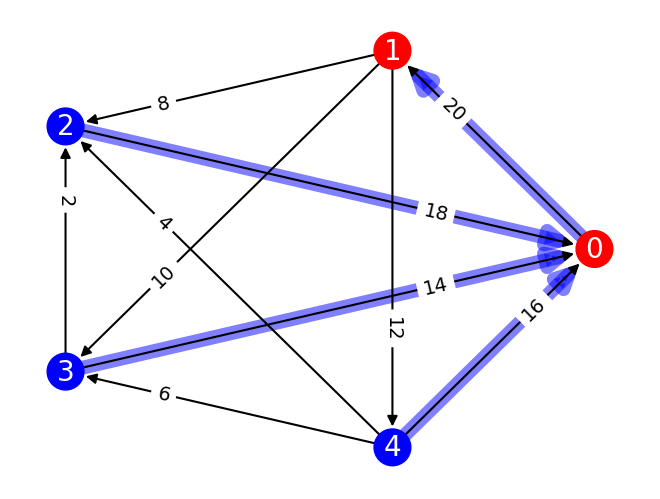

Split Cycle winners are {2, 3, 4}
There are 3 winners


6 Candidates


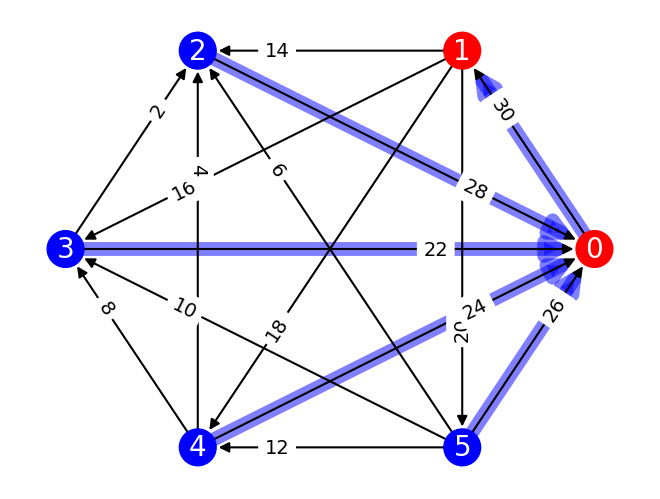

Split Cycle winners are {2, 3, 4, 5}
There are 4 winners


7 Candidates


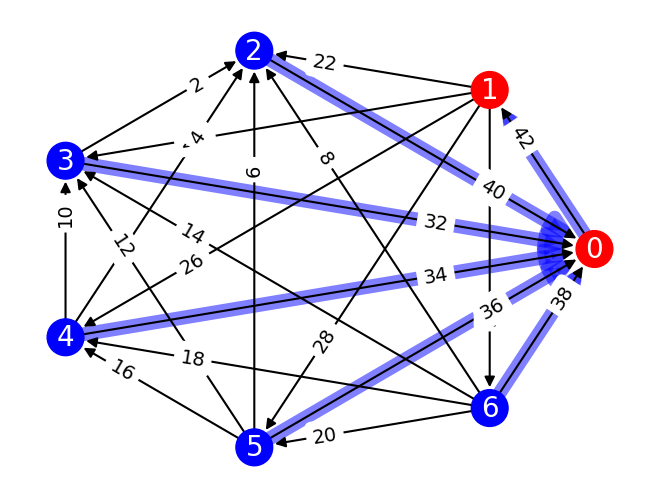

Split Cycle winners are {2, 3, 4, 5, 6}
There are 5 winners


8 Candidates


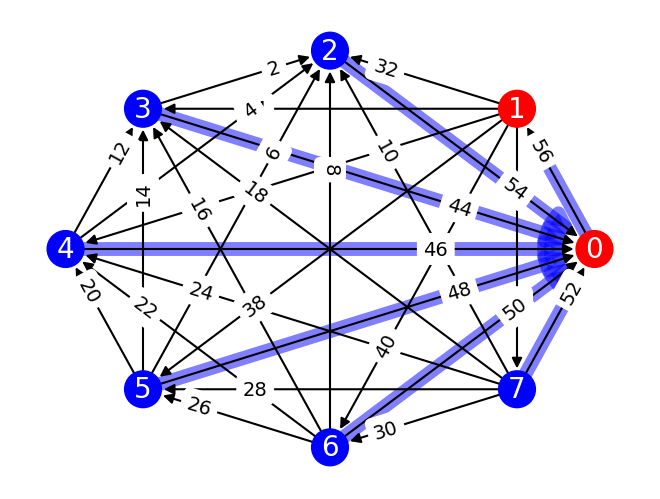

Split Cycle winners are {2, 3, 4, 5, 6, 7}
There are 6 winners


9 Candidates


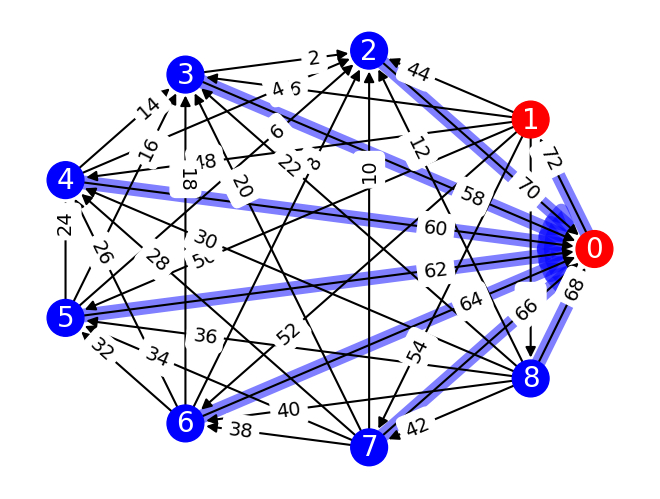

Split Cycle winners are {2, 3, 4, 5, 6, 7, 8}
There are 7 winners


10 Candidates


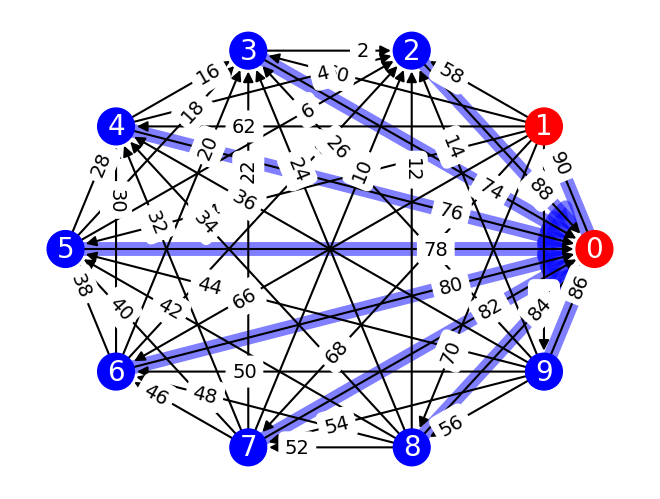

Split Cycle winners are {2, 3, 4, 5, 6, 7, 8, 9}
There are 8 winners


11 Candidates


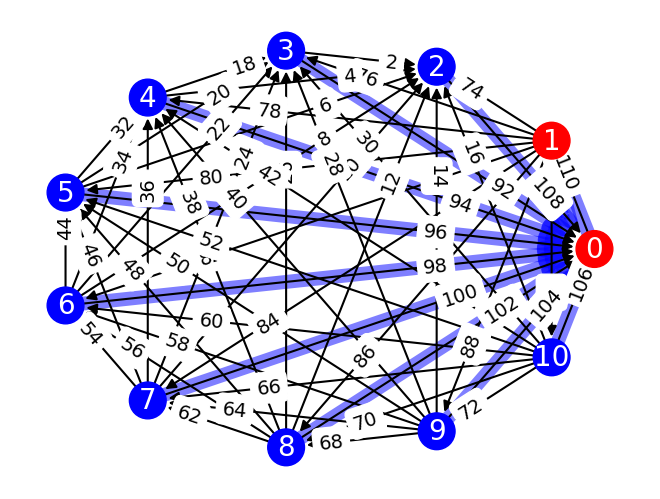

Split Cycle winners are {2, 3, 4, 5, 6, 7, 8, 9, 10}
There are 9 winners


12 Candidates


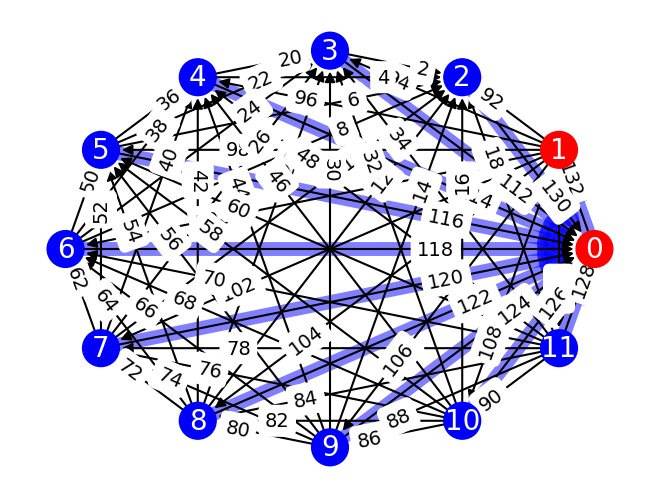

Split Cycle winners are {2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
There are 10 winners


13 Candidates


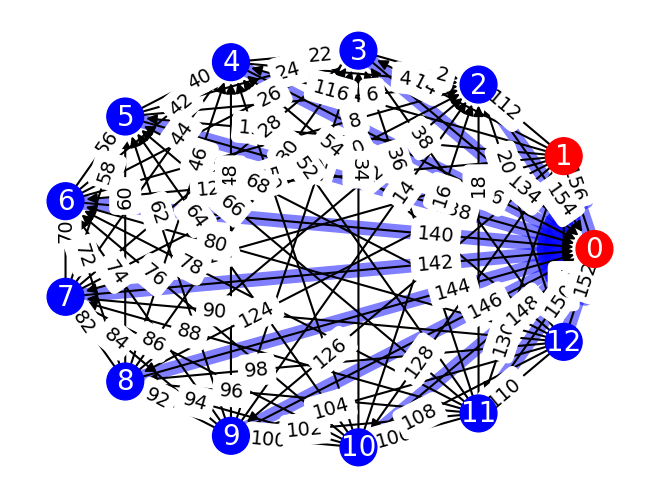

Split Cycle winners are {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
There are 11 winners


14 Candidates


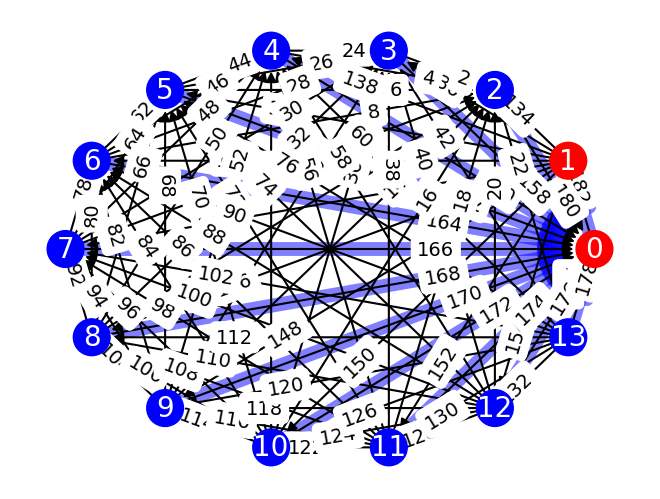

Split Cycle winners are {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
There are 12 winners




In [41]:
def generate_margin_graph_with_maximal_split_cycle_winners(num_cands): 
    """
    Generate a margin graph with num_cands - 2 Split Cycle winners.
    """
    
    a = 0
    b = 1 
    c = 2
    ds = [3 + n for n in range(num_cands - 3)]
    
    ordered_edges = [(_d, c) for _d in ds]
    
    for didx, d in enumerate(ds): 
        for _d in ds[didx+1::]:
            ordered_edges.append((_d, d))
    
    ordered_edges = ordered_edges +  [(b, c)] + [(b, d) for d in ds]
    ordered_edges = ordered_edges +  [(d, a) for d in ds] + [(c,a)]
    ordered_edges = ordered_edges + [(a, b)]
    
    mg = MarginGraph(
        [a, b, c] + ds,
        [(e[0], e[1], 2*(i+1)) for i, e in enumerate(ordered_edges)]
    )
    
    mg.display_with_defeat(split_cycle_defeat(mg))
    split_cycle.display(mg)
    print(f"There are {len(split_cycle(mg))} winners")

    
for num_cands in range(4, 15): 
    print(f"{num_cands} Candidates")
    generate_margin_graph_with_maximal_split_cycle_winners(num_cands)
    print("\n===========\n")


### Proposition 5.35

+---+---+---+---+
| 3 | 2 | 1 | 3 |
+---+---+---+---+
| c | b | d | d |
| b | a | b | a |
| a | d | a | c |
| d | c | c | b |
+---+---+---+---+


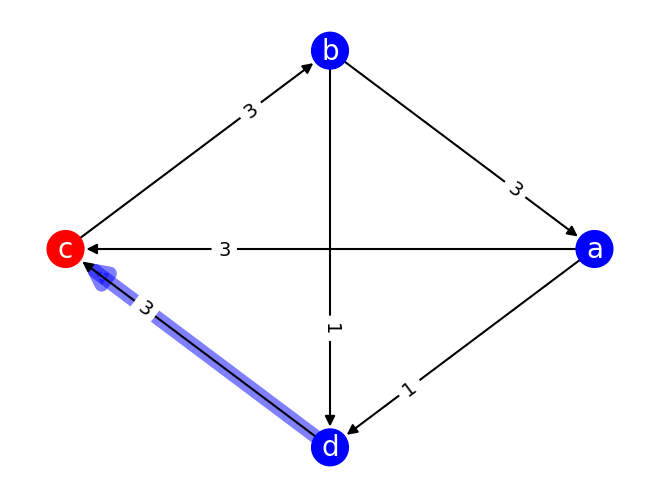



Split Cycle winners are {a, b, d}

Possible winning sets by adding a single voter with a linear order to the above profile: 
	{a, b, d} (the additional voter can use 4 different rankings to get this outcome)
	{a, c, d} (the additional voter can use 2 different rankings to get this outcome)
	{a, d} (the additional voter can use 6 different rankings to get this outcome)
	{b, c, d} (the additional voter can use 2 different rankings to get this outcome)
	{b, d} (the additional voter can use 6 different rankings to get this outcome)
	{c, d} (the additional voter can use 2 different rankings to get this outcome)
	{d} (the additional voter can use 2 different rankings to get this outcome)


In [43]:
# Example showing Split Cycle does not satisfy single-voter resolvability
cmap = cmap_abcd

prof = Profile(
    [
        (c, b, a, d), 
        (b, a, d, c), 
        (d, b, a, c), 
        (d, a, c, b)        
    ], 
    rcounts = [3, 2, 1, 3], 
    cmap = cmap)

#display the profile
prof.display()

# display the margin graph
prof.display_margin_graph_with_defeat(split_cycle_defeat(prof))

print("\n")
split_cycle.display(prof)


winning_sets = dict()

all_rankings = permutations(prof.candidates)
for r in all_rankings:
    new_prof = Profile(
        prof.rankings + [tuple(r)],
        cmap = prof.cmap
    )
    sc_winners = split_cycle(new_prof)
    if tuple(sc_winners) in winning_sets.keys():
        winning_sets[tuple(sc_winners)] += 1
    else:
        winning_sets.update({tuple(sc_winners): 1})
        

print("\nPossible winning sets by adding a single voter with a linear order to the above profile: ")
wss = sorted(list(winning_sets.keys()))
for ws in wss:
    print(f"\t{display_cands(ws, cmap)} (the additional voter can use {winning_sets[ws]} different rankings to get this outcome)")



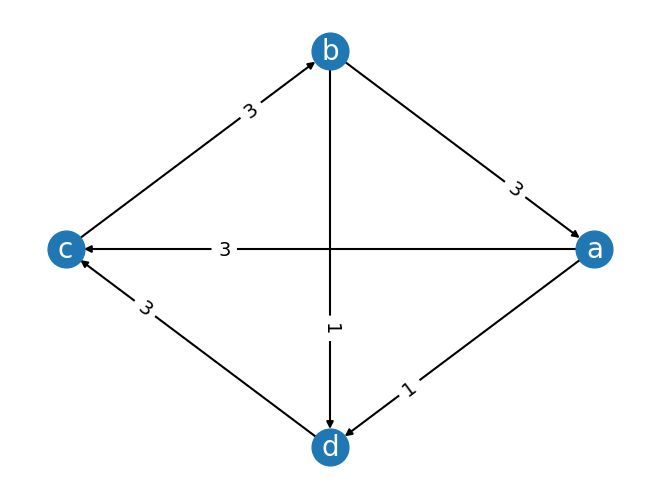


There are 729 ways that a single voter can change the margin graph by submitting an asymmetric relation

Possible winning sets after adding a single voter: 
	{a, b, c, d} (there are 15 different ways to get this outcome)
	{a, b, d} (there are 147 different ways to get this outcome)
	{a, c, d} (there are 15 different ways to get this outcome)
	{a, d} (there are 201 different ways to get this outcome)
	{b, c, d} (there are 15 different ways to get this outcome)
	{b, d} (there are 201 different ways to get this outcome)
	{c, d} (there are 25 different ways to get this outcome)
	{d} (there are 110 different ways to get this outcome)


In [44]:
prof = Profile(
    [
        (c, b, a, d), 
        (b, a, d, c), 
        (d, b, a, c), 
        (d, a, c, b)        
    ], 
    rcounts = [3, 2, 1, 3], 
    cmap = cmap)

mg = prof.margin_graph()

mg.display()

edges = mg.edges

winning_sets = dict()

for se1 in powerset(edges): 
    for se2 in powerset(edges): 
        new_edges = list()
        if set(se1).intersection(set(se2)) == set():
            new_edges += [(_e[0], _e[1], _e[2] + 1)  for _e in se1 if _e[2] + 1 > 0]
            new_edges += [(_e[0], _e[1], _e[2] - 1)  for _e in se2 if _e[2] - 1 > 0]
            new_edges += [_e for _e in edges if _e not in set(se1).union(set(se2))]
            
            new_mg = MarginGraph(mg.candidates, new_edges)
            sc_winners = split_cycle(new_mg)
            
            if tuple(sc_winners) in winning_sets.keys():
                winning_sets[tuple(sc_winners)] += 1
            else:
                winning_sets.update({tuple(sc_winners): 1})

print(f"\nThere are {sum(winning_sets.values())} ways that a single voter can change the margin graph by submitting an asymmetric relation")
                
print("\nPossible winning sets after adding a single voter: ")

wss = sorted(list(winning_sets.keys()))
for ws in wss:
    print(f"\t{display_cands(ws, cmap)} (there are {winning_sets[ws]} different ways to get this outcome)")


### Proposition B.6.1

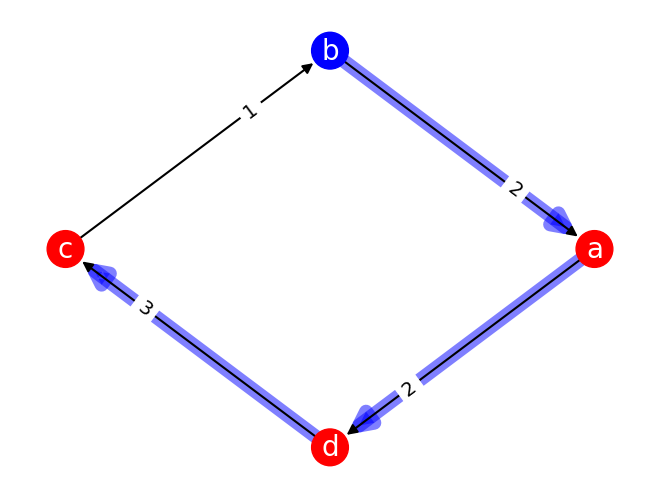

+---+---+---+---+
| 1 | 3 | 2 | 2 |
+---+---+---+---+
| c | d | a | b |
| b | c | d | a |
|   |   |   |   |
|   |   |   |   |
+---+---+---+---+
Split Cycle winner is {b}

After adding one new voters with the ranking c b d a

+---+---+---+---+
| 1 | 3 | 2 | 2 |
+---+---+---+---+
| c | d | a | b |
| b | c | d | a |
|   |   |   |   |
|   |   |   |   |
+---+---+---+---+
+---+---+---+---+---+
| 1 | 3 | 2 | 2 | 1 |
+---+---+---+---+---+
| c | d | a | b | c |
| b | c | d | a | b |
|   |   |   |   | d |
|   |   |   |   | a |
+---+---+---+---+---+
Split Cycle winner is {d}


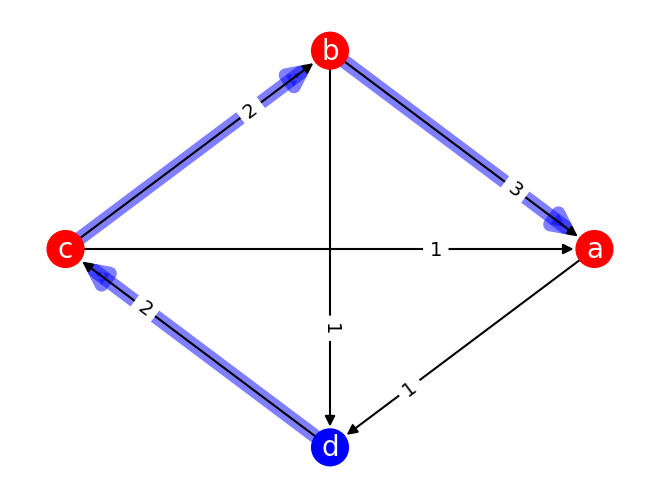

In [45]:
## Still searching for the profile...

cmap = cmap_abcd

from pref_voting.profiles_with_ties import ProfileWithTies


prof = ProfileWithTies(
    candidates = [a, b, c, d],
    rankings = [
        {b:2, c:1}, 
        {c:2, d:1},
        {a:1, d:2},
        {a:2, b:1}
    ],
    
    rcounts = [1, 3, 2, 2], 
    cmap = cmap_abcd)




prof.margin_graph().display_with_defeat(split_cycle_defeat(prof))

prof.display()
split_cycle.display(prof)
print("\nAfter adding one new voters with the ranking c b d a\n")
new_prof = ProfileWithTies(
    candidates = [a, b, c, d],
    rankings = [
        {b:2, c:1}, 
        {c:2, d:1},
        {a:1, d:2},
        {a:2, b:1},
        {c:1, b:2, d:3, a:4}
    ],
    
    rcounts = [1, 3, 2, 2, 1], 
    cmap = cmap_abcd)


prof.display()

new_prof.display()

split_cycle.display(new_prof)

new_prof.margin_graph().display_with_defeat(split_cycle_defeat(new_prof))


### Example from Section 5.4.2.2



+---+---+---+
| 3 | 5 | 4 |
+---+---+---+
| a | b | c |
| b | c | a |
| c | a | b |
+---+---+---+
Borda winners are {b, c}

There are two Borda winners, yet the profile is uniquely weighted: 


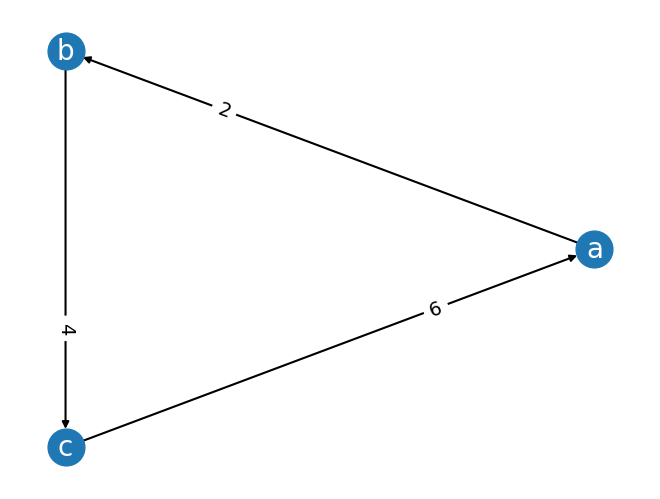

In [46]:
prof = Profile(
    [
        (a, b, c), 
        (b, c, a), 
        (c, a, b),
    ],
    rcounts = [3, 5, 4], 
    cmap = cmap_abc
)
prof.display()

borda.display(prof)

print("\nThere are two Borda winners, yet the profile is uniquely weighted: ")
prof.display_margin_graph()

### Proposition B.6.2

+---+---+---+---+---+---+---+---+---+
| 4 | 1 | 2 | 1 | 1 | 2 | 1 | 2 | 1 |
+---+---+---+---+---+---+---+---+---+
| c | b | d | a | b | a | c | d | d |
| b | a | a | b | d | d | a | b | c |
| a | d | b | d | c | c | d | a | b |
| d | c | c | c | a | b | b | c | a |
+---+---+---+---+---+---+---+---+---+
Split Cycle winner is {b}


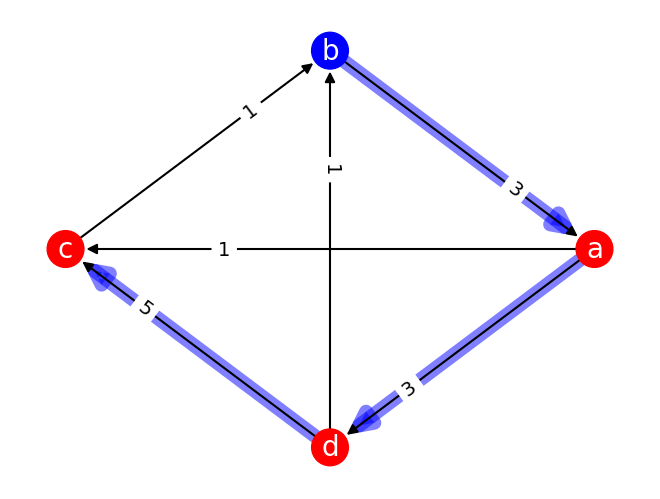


After adding two new voters with the ranking c b d a

+---+---+---+---+---+---+---+---+---+---+
| 4 | 1 | 2 | 1 | 1 | 2 | 1 | 2 | 1 | 2 |
+---+---+---+---+---+---+---+---+---+---+
| c | b | d | a | b | a | c | d | d | c |
| b | a | a | b | d | d | a | b | c | b |
| a | d | b | d | c | c | d | a | b | d |
| d | c | c | c | a | b | b | c | a | a |
+---+---+---+---+---+---+---+---+---+---+
Split Cycle winner is {d}


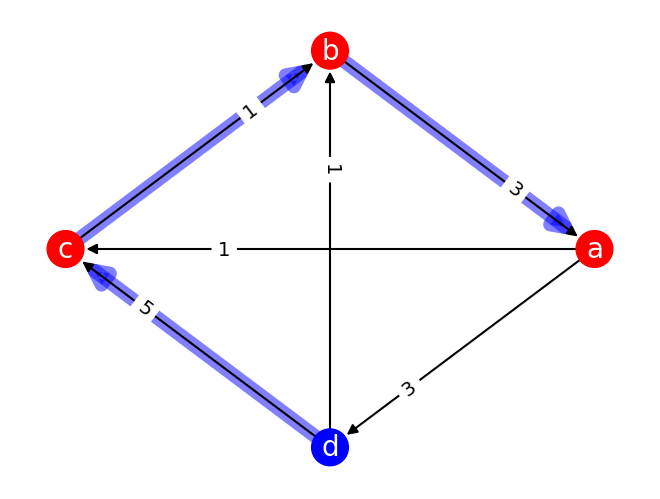

In [47]:

cmap = cmap_abcd

prof = Profile(
    [
        [2, 1, 0, 3],
        [1, 0, 3, 2],
        [3, 0, 1, 2],
        [0, 1, 3, 2],
        [1, 3, 2, 0],
        [0, 3, 2, 1],
        [2, 0, 3, 1],
        [3, 1, 0, 2],
        [3, 2, 1, 0]],
    rcounts = [4, 1, 2, 1, 1, 2, 1, 2, 1],
    cmap = cmap
)

prof.display()

split_cycle.display(prof)
prof.display_margin_graph_with_defeat(split_cycle_defeat(prof))


print("\nAfter adding two new voters with the ranking c b d a\n")
new_prof = Profile(
    [
        [c, b, a, d],
        [b, a, d, c],
        [d, a, b, c],
        [a, b, d, c],
        [b, d, c, a],
        [a, d, c, b],
        [c, a, d, b],
        [d, b, a, c],
        [d, c, b, a],
        [c, b, d, a] # new rankings
    ],
    rcounts = [4, 1, 2, 1, 1, 2, 1, 2, 1, 2],
    cmap = cmap
)

new_prof.display()

split_cycle.display(new_prof)
prof.display_margin_graph_with_defeat(split_cycle_defeat(new_prof))